In [39]:
import pandas as pd
from IPython.display import display 
import matplotlib.pyplot as plt

import numpy as np

In [40]:
from sklearn.decomposition import PCA

# Table of content (TOC) <a name="toc">

1. [Load data](#load-data)
2. [First analysis](#first-analysis)
3. [Data visualization analysis](#data_visualization_analysis)

# **Load data** <a name="load-data">

In [321]:
data = pd.read_csv("data/clean_data.csv") #,  skiprows=1, header=None

In [322]:
data

RANDID  SEX  TOTCHOL   AGE  SYSBP  DIABP  CURSMOKE  CIGPDAY     BMI  \
0         2448.0  1.0    195.0  39.0  106.0   70.0       0.0      0.0  26.970   
1         2448.0  1.0    209.0  52.0  121.0   66.0       0.0      0.0  27.794   
2         6238.0  2.0    250.0  46.0  121.0   81.0       0.0      0.0  28.730   
3         6238.0  2.0    260.0  52.0  105.0   70.0       0.0      0.0  29.430   
4         6238.0  2.0    237.0  58.0  108.0   66.0       0.0      0.0  28.500   
...          ...  ...      ...   ...    ...    ...       ...      ...     ...   
11622  9998212.0  1.0    173.0  46.0  126.0   82.0       0.0      0.0  19.170   
11623  9998212.0  1.0    153.0  52.0  143.0   89.0       0.0      0.0  25.740   
11624  9999312.0  2.0    196.0  39.0  133.0   86.0       1.0     30.0  20.910   
11625  9999312.0  2.0    240.0  46.0  138.0   79.0       1.0     20.0  26.390   
11626  9999312.0  2.0    189.0  50.0  147.0   96.0       1.0     10.0  24.190   

       DIABETES  ...  CVD  HYPERTEN  TIMEAP  TIMEMI  TIMEMIFC  TIMECHD  \
0           0.0  ...  1.0       0.0  8766.0  6438.0    6438.0   6438.0   
1           0.0  ...  1.0       0.0  8766.0  6438.0    6438.0   6438.0   
2           0.0  ...  0.0       0.0  8766.0  8766.0    8766.0   8766.0   
3           0.0  ...  0.0       0.0  8766.0  8766.0    8766.0   8766.0   
4           0.0  ...  0.0       0.0  8766.0  8766.0    8766.0   8766.0   
...         ...  ...  ...       ...     ...     ...       ...      ...   
11622       0.0  ...  0.0       1.0  8766.0  8766.0    8766.0   8766.0   
11623       0.0  ...  0.0       1.0  8766.0  8766.0    8766.0   8766.0   
11624       0.0  ...  0.0       1.0  8766.0  8766.0    8766.0   8766.0   
11625       0.0  ...  0.0       1.0  8766.0  8766.0    8766.0   8766.0   
11626       0.0  ...  0.0       1.0  8766.0  8766.0    8766.0   8766.0   

       TIMESTRK  TIMECVD  TIMEDTH  TIMEHYP  
0        8766.0   6438.0   8766.0   8766.0  
1        8766.0   6438.0   8766.0   8766.0  
2        8766.0   8766.0   8766.0   8766.0  
3        8766.0   8766.0   8766.0   8766.0  
4        8766.0   8766.0   8766.0   8766.0  
...         ...      ...      ...      ...  
11622    8766.0   8766.0   8766.0      0.0  
11623    8766.0   8766.0   8766.0      0.0  
11624    8766.0   8766.0   8766.0   4201.0  
11625    8766.0   8766.0   8766.0   4201.0  
11626    8766.0   8766.0   8766.0   4201.0  

[11627 rows x 39 columns]

In [326]:
X = data.iloc[:,1:23]
Y = data.iloc[:,23:31]
Y_time = data.iloc[:, 31:]

FUMEUR = data.loc[:, ['AGE', 'CURSMOKE', 'CIGPDAY']]

blood_pression = data.loc[:, ['AGE', 'SYSBP', 'DIABP']]
angina = data.loc[:, ['ANGINA']]

In [329]:
X= FUMEUR
Y= angina

Y = Y.squeeze()
X, Y

(        AGE  CURSMOKE  CIGPDAY
 0      39.0       0.0      0.0
 1      52.0       0.0      0.0
 2      46.0       0.0      0.0
 3      52.0       0.0      0.0
 4      58.0       0.0      0.0
 ...     ...       ...      ...
 11622  46.0       0.0      0.0
 11623  52.0       0.0      0.0
 11624  39.0       1.0     30.0
 11625  46.0       1.0     20.0
 11626  50.0       1.0     10.0
 
 [11627 rows x 3 columns],
 0        0.0
 1        0.0
 2        0.0
 3        0.0
 4        0.0
         ... 
 11622    0.0
 11623    0.0
 11624    0.0
 11625    0.0
 11626    0.0
 Name: ANGINA, Length: 11627, dtype: float64)

Text(0.5, 1.0, 'PCA of FUMEUR')

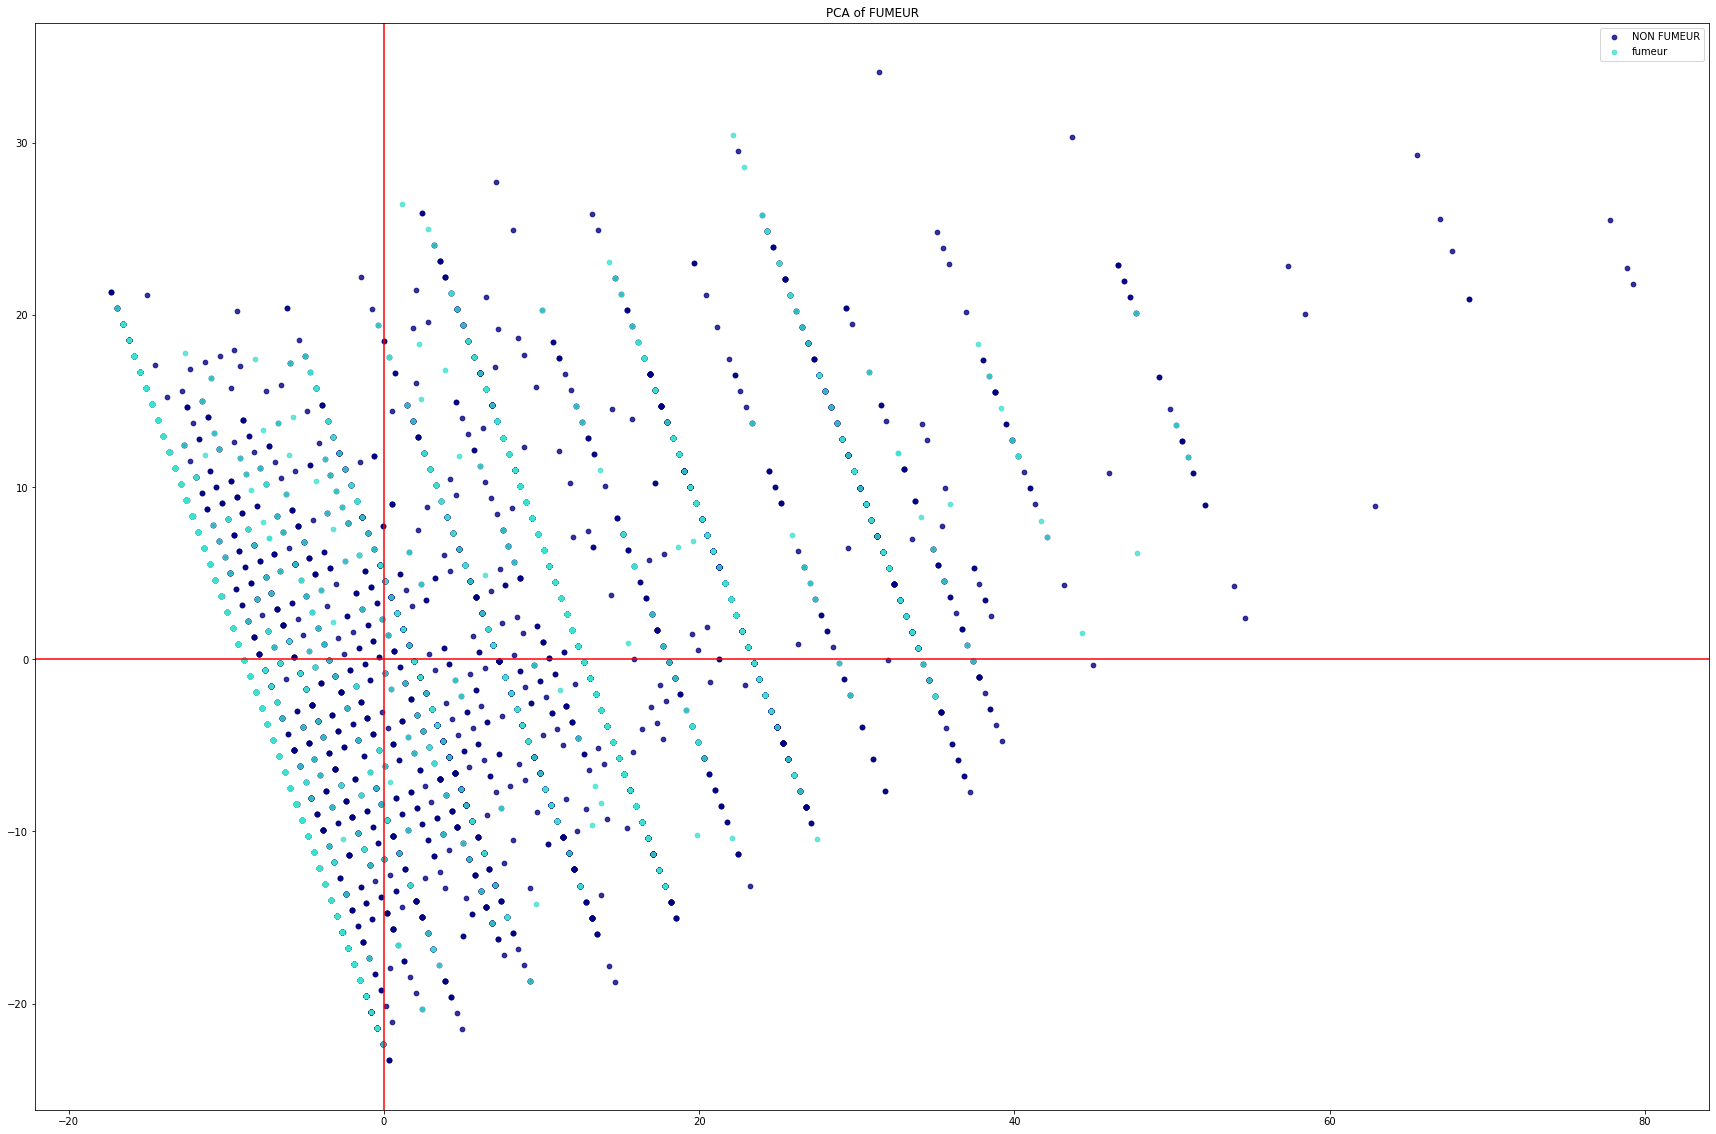

In [330]:
pca = PCA(n_components=3)
X_r = pca.fit(X).transform(X)



plt.figure(figsize=(30, 20))
colors = ['navy', 'turquoise', 'darkorange']
lw = 1

for color, i, target_name in zip(colors, [j for j in range(22)],['NON FUMEUR', 'fumeur']):
    plt.scatter(X_r[Y == i, 0], X_r[Y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name, s=22)
    
plt.axhline(y=0, color='r', linestyle='-')
plt.axvline(x=0, color='r', linestyle='-')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of FUMEUR')

In [332]:
X

AGE  SYSBP  DIABP
0      39.0  106.0   70.0
1      52.0  121.0   66.0
2      46.0  121.0   81.0
3      52.0  105.0   70.0
4      58.0  108.0   66.0
...     ...    ...    ...
11622  46.0  126.0   82.0
11623  52.0  143.0   89.0
11624  39.0  133.0   86.0
11625  46.0  138.0   79.0
11626  50.0  147.0   96.0

[11627 rows x 3 columns]

In [ ]:
X['DIABP'] = X[X['DIABP'] > 80]

Text(0.5, 1.0, 'PCA of FUMEUR')

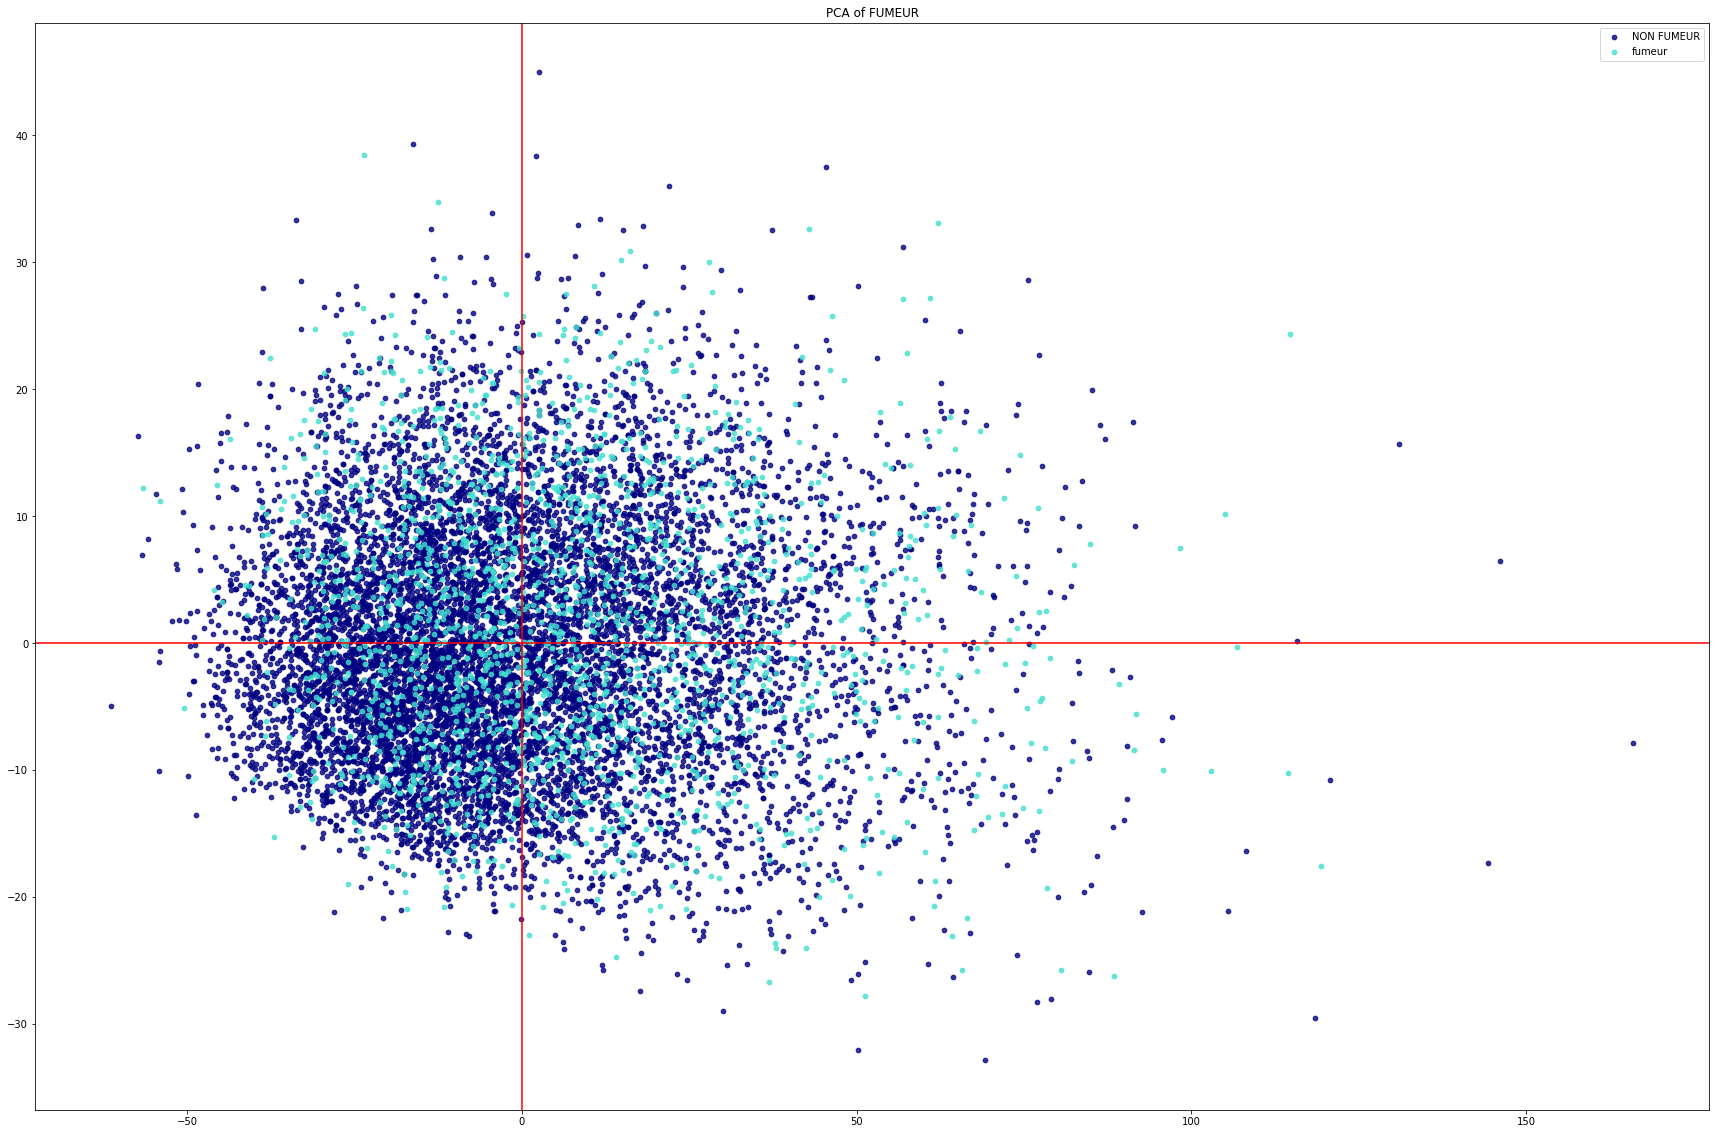

In [331]:
X = blood_pression
pca = PCA(n_components=3)
X_r = pca.fit(X).transform(X)



plt.figure(figsize=(30, 20))
colors = ['navy', 'turquoise', 'darkorange']
lw = 1

for color, i, target_name in zip(colors, [j for j in range(22)],['NON FUMEUR', 'fumeur']):
    plt.scatter(X_r[Y == i, 0], X_r[Y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name, s=22)
    
plt.axhline(y=0, color='r', linestyle='-')
plt.axvline(x=0, color='r', linestyle='-')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of FUMEUR')

#  **First analysis** <a name="first-analysis">

* Extraction by sex and period
* Generate descriptive statistics of each period and each sex
    
1. [Period 1](#first-analysis-period1)
2. [Period 2](#first-analysis-period2)
3. [Period 3](#first-analysis-period3)

[TOC](#toc)

## Period 1 analysis <a name="first-analysis-period1">
    
[First analysis](#first-analysis)

In [4]:
man_period_1 = data.loc[ (data.SEX == 1) & (data.PERIOD == 1), data.columns != 'RANDID' ]
man_period_1.describe().loc[:, man_period_1.columns != 'SEX']

TOTCHOL          AGE        SYSBP        DIABP     CURSMOKE  \
count  1937.000000  1944.000000  1944.000000  1944.000000  1944.000000   
mean    233.579763    49.786523   131.736883    83.708848     0.604424   
std      42.355966     8.719935    19.441238    11.437566     0.489100   
min     113.000000    33.000000    83.500000    48.000000     0.000000   
25%     206.000000    42.000000   118.000000    76.000000     0.000000   
50%     231.000000    49.000000   129.000000    82.000000     1.000000   
75%     259.000000    57.000000   141.500000    90.000000     1.000000   
max     696.000000    69.000000   235.000000   136.000000     1.000000   

           CIGPDAY          BMI     DIABETES       BPMEDS     HEARTRTE  ...  \
count  1928.000000  1939.000000  1944.000000  1922.000000  1943.000000  ...   
mean     13.227178    26.169582     0.030350     0.021852    74.397324  ...   
std      13.780368     3.407115     0.171592     0.146239    11.903735  ...   
min       0.000000    15.540000     0.000000     0.000000    44.000000  ...   
25%       0.000000    23.970000     0.000000     0.000000    66.000000  ...   
50%      10.500000    26.080000     0.000000     0.000000    75.000000  ...   
75%      20.000000    28.320000     0.000000     0.000000    80.000000  ...   
max      70.000000    40.380000     1.000000     1.000000   130.000000  ...   

               CVD     HYPERTEN       TIMEAP       TIMEMI     TIMEMIFC  \
count  1944.000000  1944.000000  1944.000000  1944.000000  1944.000000   
mean      0.352881     0.722222  6507.496914  6736.198045  6654.539609   
std       0.477989     0.448018  2929.238512  2770.552807  2815.784676   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000  4574.000000  5007.250000  4832.500000   
50%       0.000000     1.000000  8485.500000  8766.000000  8742.500000   
75%       1.000000     1.000000  8766.000000  8766.000000  8766.000000   
max       1.000000     1.000000  8766.000000  8766.000000  8766.000000   

           TIMECHD     TIMESTRK      TIMECVD      TIMEDTH      TIMEHYP  
count  1944.000000  1944.000000  1944.000000  1944.000000  1944.000000  
mean   6155.881687  7003.434671  6273.698045  7193.645062  3313.345679  
std    3066.851263  2509.104302  3015.175679  2385.761805  3390.769977  
min       0.000000     0.000000     0.000000    26.000000     0.000000  
25%    3864.000000  5609.250000  4010.000000  6053.500000     0.000000  
50%    7653.000000  8766.000000  7894.500000  8766.000000  2155.500000  
75%    8766.000000  8766.000000  8766.000000  8766.000000  6471.000000  
max    8766.000000  8766.000000  8766.000000  8766.000000  8766.000000  

[8 rows x 37 columns]

In [5]:
woman_period_1 = data.loc[ (data.SEX == 2) & (data.PERIOD == 1), data.columns != 'RANDID' ]
woman_period_1.describe().loc[:, woman_period_1.columns != 'SEX']

TOTCHOL          AGE        SYSBP        DIABP     CURSMOKE  \
count  2445.000000  2490.000000  2490.000000  2490.000000  2490.000000   
mean    239.681391    50.034538   133.821888    82.595382     0.404016   
std      46.219672     8.643398    24.462628    12.498149     0.490799   
min     107.000000    32.000000    83.500000    50.000000     0.000000   
25%     206.000000    43.000000   116.000000    74.000000     0.000000   
50%     237.000000    49.000000   128.500000    81.000000     0.000000   
75%     269.000000    57.000000   146.500000    89.000000     1.000000   
max     600.000000    70.000000   295.000000   142.500000     1.000000   

           CIGPDAY          BMI    DIABETES       BPMEDS     HEARTRTE  ...  \
count  2474.000000  2476.000000  2490.00000  2451.000000  2490.000000  ...   
mean      5.645918    25.592884     0.02490     0.041616    77.056627  ...   
std       8.955518     4.557443     0.15585     0.199750    12.150374  ...   
min       0.000000    15.960000     0.00000     0.000000    46.000000  ...   
25%       0.000000    22.540000     0.00000     0.000000    69.000000  ...   
50%       0.000000    24.830000     0.00000     0.000000    75.000000  ...   
75%      10.000000    27.820000     0.00000     0.000000    85.000000  ...   
max      50.000000    56.800000     1.00000     1.000000   143.000000  ...   

               CVD     HYPERTEN       TIMEAP       TIMEMI     TIMEMIFC  \
count  2490.000000  2490.000000  2490.000000  2490.000000  2490.000000   
mean      0.189157     0.742169  7209.019277  7633.872691  7600.357831   
std       0.391712     0.437529  2558.833194  2153.806418  2197.131856   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000  6132.000000  7541.250000  7452.750000   
50%       0.000000     1.000000  8766.000000  8766.000000  8766.000000   
75%       0.000000     1.000000  8766.000000  8766.000000  8766.000000   
max       1.000000     1.000000  8766.000000  8766.000000  8766.000000   

           TIMECHD     TIMESTRK      TIMECVD      TIMEDTH      TIMEHYP  
count  2490.000000  2490.000000  2490.000000  2490.000000  2490.000000  
mean   7064.610040  7539.784337  7242.856225  7749.204418  3532.130924  
std    2656.316034  2262.425559  2549.011678  2037.482634  3496.114252  
min       0.000000     0.000000     0.000000    34.000000     0.000000  
25%    5618.500000  7285.750000  6244.250000  8019.750000     0.000000  
50%    8766.000000  8766.000000  8766.000000  8766.000000  2218.500000  
75%    8766.000000  8766.000000  8766.000000  8766.000000  7339.500000  
max    8766.000000  8766.000000  8766.000000  8766.000000  8766.000000  

[8 rows x 37 columns]

## Period 2 analysis <a name="first-analysis-period2">
    
[First analysis](#first-analysis)

In [6]:
men_period_2 = data.loc[ (data.SEX == 1) & (data.PERIOD == 2), data.columns != 'RANDID' ]
men_period_2.describe().loc[:, men_period_2.columns != 'SEX']

TOTCHOL          AGE        SYSBP        DIABP     CURSMOKE  \
count  1666.000000  1691.000000  1691.000000  1691.000000  1691.000000   
mean    241.822929    55.102306   135.476937    84.608811     0.520402   
std      42.141666     8.508030    19.895327    10.906826     0.499731   
min     115.000000    39.000000    88.000000    53.000000     0.000000   
25%     214.000000    48.000000   120.000000    78.000000     0.000000   
50%     240.000000    54.000000   132.000000    84.000000     1.000000   
75%     266.000000    62.000000   148.000000    91.000000     1.000000   
max     614.000000    75.000000   216.000000   124.000000     1.000000   

           CIGPDAY          BMI     DIABETES       BPMEDS     HEARTRTE  ...  \
count  1682.000000  1685.000000  1691.000000  1654.000000  1691.000000  ...   
mean     12.231867    26.226481     0.043761     0.061064    75.921348  ...   
std      15.036335     3.398327     0.204624     0.239520    12.656839  ...   
min       0.000000    16.240000     0.000000     0.000000    42.000000  ...   
25%       0.000000    24.050000     0.000000     0.000000    68.000000  ...   
50%       2.000000    26.090000     0.000000     0.000000    75.000000  ...   
75%      20.000000    28.230000     0.000000     0.000000    83.000000  ...   
max      90.000000    39.460000     1.000000     1.000000   130.000000  ...   

               CVD     HYPERTEN       TIMEAP       TIMEMI     TIMEMIFC  \
count  1691.000000  1691.000000  1691.000000  1691.000000  1691.000000   
mean      0.331165     0.739208  6962.490242  7213.095801  7143.768185   
std       0.470771     0.439197  2578.156886  2344.900572  2399.528540   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000  5531.500000  6057.500000  5875.000000   
50%       0.000000     1.000000  8766.000000  8766.000000  8766.000000   
75%       1.000000     1.000000  8766.000000  8766.000000  8766.000000   
max       1.000000     1.000000  8766.000000  8766.000000  8766.000000   

           TIMECHD     TIMESTRK      TIMECVD      TIMEDTH      TIMEHYP  
count  1691.000000  1691.000000  1691.000000  1691.000000  1691.000000  
mean   6608.645772  7506.645180  6746.266115  7690.318746  3507.263749  
std    2784.584174  1942.007576  2696.579778  1752.146261  3410.102980  
min       0.000000     0.000000     0.000000  2142.000000     0.000000  
25%    4800.500000  6469.000000  5068.000000  6961.000000     0.000000  
50%    8365.000000  8766.000000  8744.000000  8766.000000  2245.000000  
75%    8766.000000  8766.000000  8766.000000  8766.000000  6835.000000  
max    8766.000000  8766.000000  8766.000000  8766.000000  8766.000000  

[8 rows x 37 columns]

In [7]:
woman_period_2 = data.loc[ (data.SEX == 2) & (data.PERIOD == 2), data.columns != 'RANDID' ]
woman_period_2.describe().loc[:, woman_period_2.columns != 'SEX']

TOTCHOL          AGE        SYSBP        DIABP     CURSMOKE  \
count  2121.000000  2239.000000  2239.000000  2239.000000  2239.000000   
mean    255.671381    55.664136   138.058062    83.574587     0.378294   
std      47.533067     8.562900    24.300058    11.788065     0.485070   
min     122.000000    39.000000    88.000000    47.000000     0.000000   
25%     223.000000    48.000000   121.000000    76.000000     0.000000   
50%     252.000000    55.000000   134.000000    82.000000     0.000000   
75%     285.000000    62.000000   151.000000    90.000000     1.000000   
max     638.000000    76.000000   282.000000   150.000000     1.000000   

           CIGPDAY          BMI     DIABETES       BPMEDS     HEARTRTE  ...  \
count  2215.000000  2229.000000  2239.000000  2190.000000  2238.000000  ...   
mean      5.972912    25.649812     0.036177     0.123288    78.356122  ...   
std      10.003441     4.580000     0.186772     0.328842    12.760284  ...   
min       0.000000    15.330000     0.000000     0.000000    45.000000  ...   
25%       0.000000    22.540000     0.000000     0.000000    70.000000  ...   
50%       0.000000    24.880000     0.000000     0.000000    75.000000  ...   
75%      10.000000    27.850000     0.000000     0.000000    85.000000  ...   
max      60.000000    56.800000     1.000000     1.000000   220.000000  ...   

               CVD     HYPERTEN       TIMEAP       TIMEMI     TIMEMIFC  \
count  2239.000000  2239.000000  2239.000000  2239.000000  2239.000000   
mean      0.186244     0.753015  7488.794998  7938.919607  7903.757481   
std       0.389390     0.431354  2258.046700  1704.386083  1762.780588   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000  6983.500000  8372.000000  8299.500000   
50%       0.000000     1.000000  8766.000000  8766.000000  8766.000000   
75%       0.000000     1.000000  8766.000000  8766.000000  8766.000000   
max       1.000000     1.000000  8766.000000  8766.000000  8766.000000   

           TIMECHD     TIMESTRK      TIMECVD      TIMEDTH      TIMEHYP  
count  2239.000000  2239.000000  2239.000000  2239.000000  2239.000000  
mean   7349.100045  7836.778026  7527.014292  8038.440375  3647.227780  
std    2377.332448  1857.922488  2249.737567  1557.862479  3493.148623  
min       0.000000     0.000000     0.000000  2205.000000     0.000000  
25%    6410.500000  8150.500000  7076.500000  8766.000000     0.000000  
50%    8766.000000  8766.000000  8766.000000  8766.000000  2772.000000  
75%    8766.000000  8766.000000  8766.000000  8766.000000  7469.500000  
max    8766.000000  8766.000000  8766.000000  8766.000000  8766.000000  

[8 rows x 37 columns]

## Period 3 analysis <a name="first-analysis-period3">
    
[First analysis](#first-analysis)

In [8]:
men_period_3 = data.loc[ (data.SEX == 1) & (data.PERIOD == 3), data.columns != 'RANDID' ]
men_period_3.describe().loc[:, men_period_3.columns != 'SEX']

TOTCHOL          AGE        SYSBP        DIABP     CURSMOKE  \
count  1312.000000  1387.000000  1387.000000  1387.000000  1387.000000   
mean    225.742378    60.348955   139.257751    82.552992     0.388609   
std      41.127538     8.191481    21.151674    11.287367     0.487610   
min     130.000000    45.000000    91.000000    30.000000     0.000000   
25%     198.000000    53.000000   123.000000    75.000000     0.000000   
50%     222.000000    60.000000   136.000000    81.500000     0.000000   
75%     252.000000    67.000000   152.000000    90.000000     1.000000   
max     413.000000    80.000000   225.000000   123.000000     1.000000   

           CIGPDAY          BMI     DIABETES       BPMEDS     HEARTRTE  ...  \
count  1380.000000  1380.000000  1387.000000  1198.000000  1387.000000  ...   
mean      8.702899    26.224246     0.086518     0.115192    75.877433  ...   
std      13.508255     3.493956     0.281228     0.319387    12.730449  ...   
min       0.000000    14.430000     0.000000     0.000000    43.000000  ...   
25%       0.000000    24.017500     0.000000     0.000000    66.000000  ...   
50%       0.000000    26.090000     0.000000     0.000000    75.000000  ...   
75%      20.000000    28.250000     0.000000     0.000000    85.000000  ...   
max      80.000000    45.430000     1.000000     1.000000   150.000000  ...   

               CVD     HYPERTEN       TIMEAP       TIMEMI     TIMEMIFC  \
count  1387.000000  1387.000000  1387.000000  1387.000000  1387.000000   
mean      0.319394     0.744052  7437.912040  7679.852199  7613.967556   
std       0.466410     0.436550  2211.526503  1973.004821  2037.439626   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000  6671.000000  7202.000000  7013.500000   
50%       0.000000     1.000000  8766.000000  8766.000000  8766.000000   
75%       1.000000     1.000000  8766.000000  8766.000000  8766.000000   
max       1.000000     1.000000  8766.000000  8766.000000  8766.000000   

           TIMECHD     TIMESTRK      TIMECVD      TIMEDTH      TIMEHYP  
count  1387.000000  1387.000000  1387.000000  1387.000000  1387.000000  
mean   7094.719539  7958.942322  7220.617159  8143.580389  3757.140591  
std    2477.391742  1438.837473  2378.490315  1148.659623  3442.218920  
min       0.000000     0.000000     0.000000  4182.000000     0.000000  
25%    5965.500000  7512.500000  6187.000000  7971.500000     0.000000  
50%    8766.000000  8766.000000  8766.000000  8766.000000  2921.000000  
75%    8766.000000  8766.000000  8766.000000  8766.000000  7409.000000  
max    8766.000000  8766.000000  8766.000000  8766.000000  8766.000000  

[8 rows x 37 columns]

In [9]:
woman_period_3 = data.loc[ (data.SEX == 2) & (data.PERIOD == 3), data.columns != 'RANDID' ]
woman_period_3.describe().loc[:, woman_period_3.columns != 'SEX']

TOTCHOL          AGE        SYSBP        DIABP     CURSMOKE  \
count  1737.000000  1876.000000  1876.000000  1876.000000  1876.000000   
mean    245.000000    60.869403   140.924041    81.231077     0.310235   
std      45.076676     8.369054    24.138008    11.229606     0.462713   
min     112.000000    44.000000    86.000000    46.000000     0.000000   
25%     214.000000    54.000000   123.000000    73.000000     0.000000   
50%     242.000000    60.000000   138.000000    80.000000     0.000000   
75%     270.000000    67.000000   156.000000    88.000000     1.000000   
max     625.000000    81.000000   267.000000   130.000000     1.000000   

           CIGPDAY          BMI     DIABETES       BPMEDS     HEARTRTE  ...  \
count  1869.000000  1866.000000  1876.000000  1619.000000  1872.000000  ...   
mean      5.345639    25.651125     0.071429     0.179741    78.454594  ...   
std       9.781026     4.450496     0.257608     0.384090    12.197470  ...   
min       0.000000    14.530000     0.000000     0.000000    37.000000  ...   
25%       0.000000    22.607500     0.000000     0.000000    70.000000  ...   
50%       0.000000    24.800000     0.000000     0.000000    77.000000  ...   
75%       8.000000    27.940000     0.000000     0.000000    85.000000  ...   
max      60.000000    56.800000     1.000000     1.000000   130.000000  ...   

               CVD     HYPERTEN       TIMEAP       TIMEMI     TIMEMIFC  \
count  1876.000000  1876.000000  1876.000000  1876.000000  1876.000000   
mean      0.171642     0.757996  7856.707356  8297.229744  8264.591684   
std       0.377169     0.428411  1918.701534  1165.286536  1248.120525   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000  8207.750000  8766.000000  8766.000000   
50%       0.000000     1.000000  8766.000000  8766.000000  8766.000000   
75%       0.000000     1.000000  8766.000000  8766.000000  8766.000000   
max       1.000000     1.000000  8766.000000  8766.000000  8766.000000   

           TIMECHD     TIMESTRK      TIMECVD      TIMEDTH      TIMEHYP  
count  1876.000000  1876.000000  1876.000000  1876.000000  1876.000000  
mean   7705.574627  8211.607676  7896.241471  8391.336354  3891.703625  
std    2083.774589  1346.849938  1883.899068   948.839775  3501.397892  
min       0.000000     0.000000     0.000000  4249.000000     0.000000  
25%    7576.250000  8766.000000  8344.750000  8766.000000     0.000000  
50%    8766.000000  8766.000000  8766.000000  8766.000000  2955.500000  
75%    8766.000000  8766.000000  8766.000000  8766.000000  7962.500000  
max    8766.000000  8766.000000  8766.000000  8766.000000  8766.000000  

[8 rows x 37 columns]

# Data visualization analysis <a name="data_visualization_analysis">
    
1. [stat_parameter](#stat_parameter)
2. [Experience analysis](#experience_analysis)
    
[TOC](#toc)

In [10]:
## TODO to move into the data transformation
data['SEX'].where(data.SEX != 2, 0, inplace = True)

<ipython-input-11-25ad361a4b6f>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))


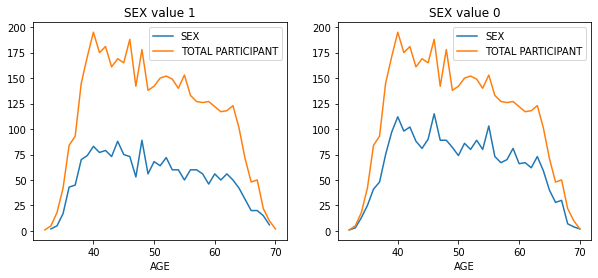

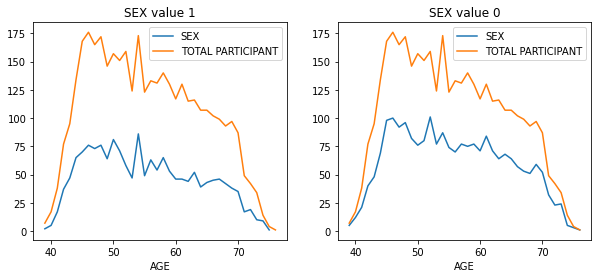

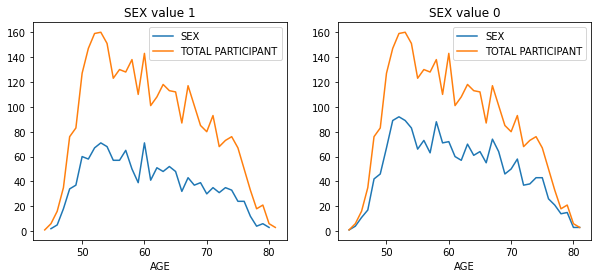

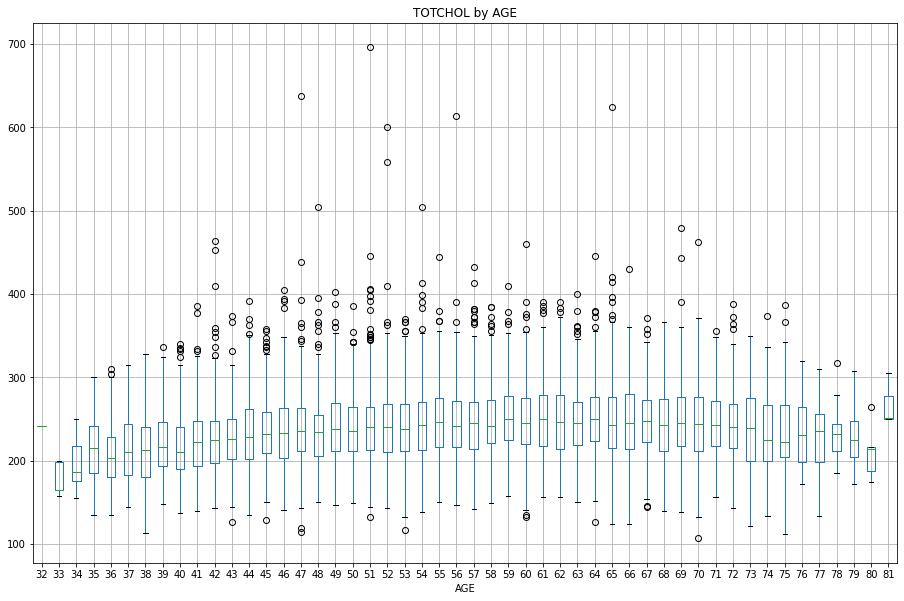

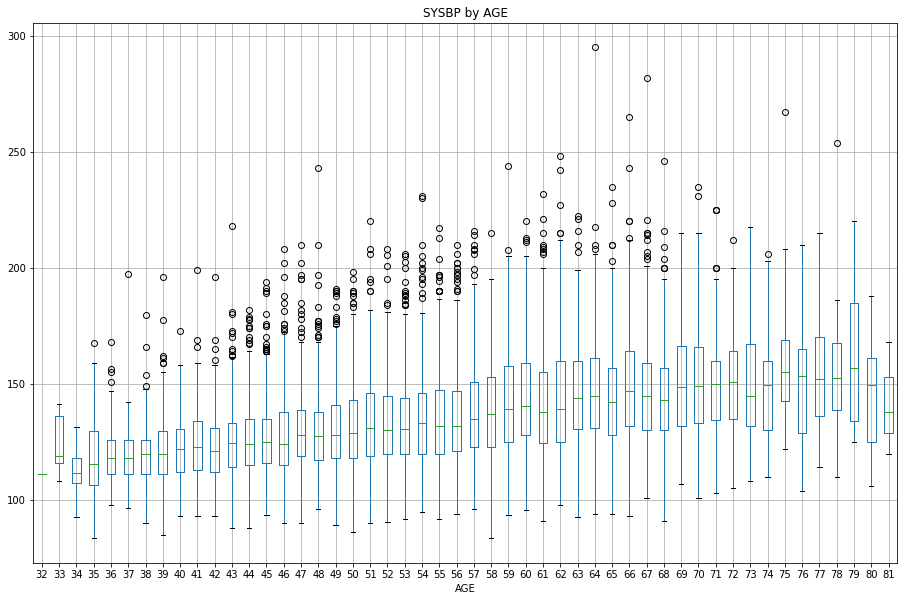

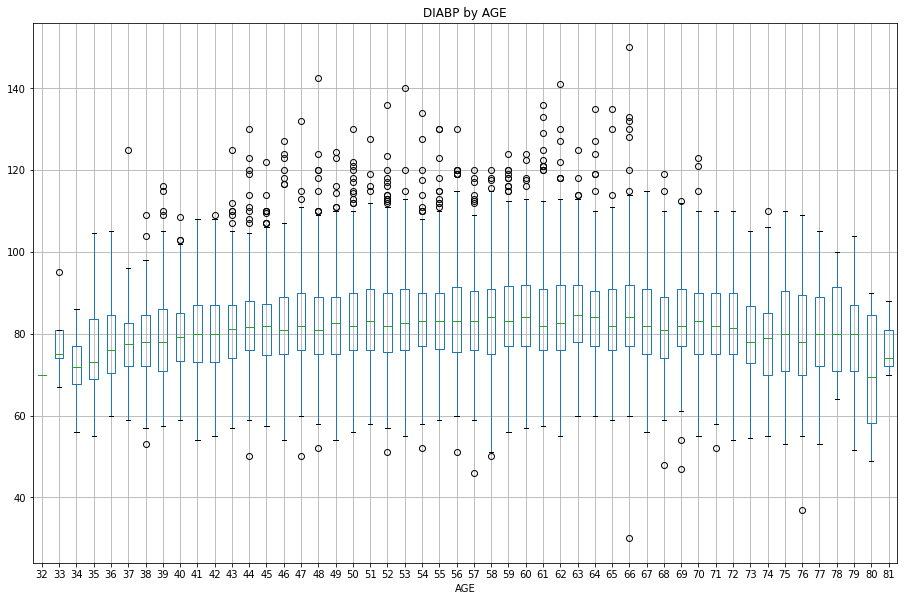

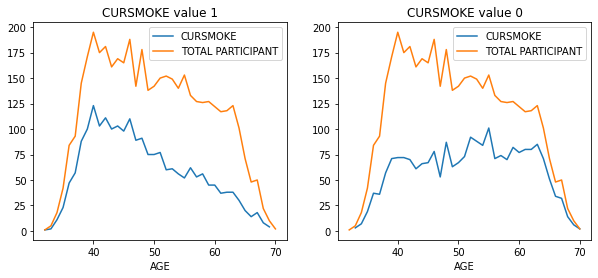

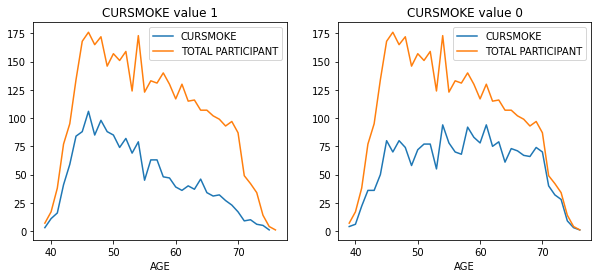

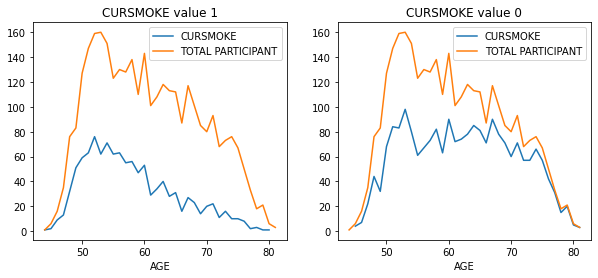

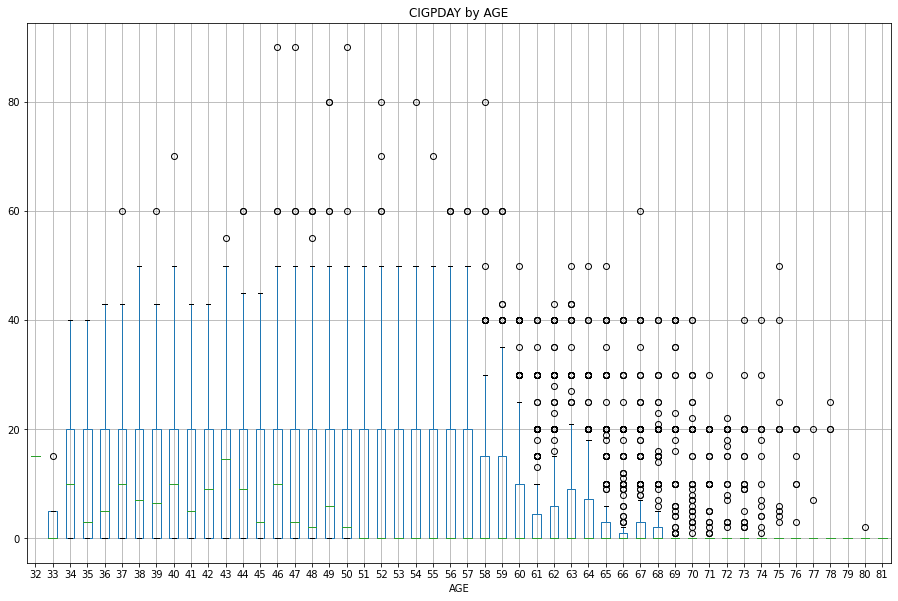

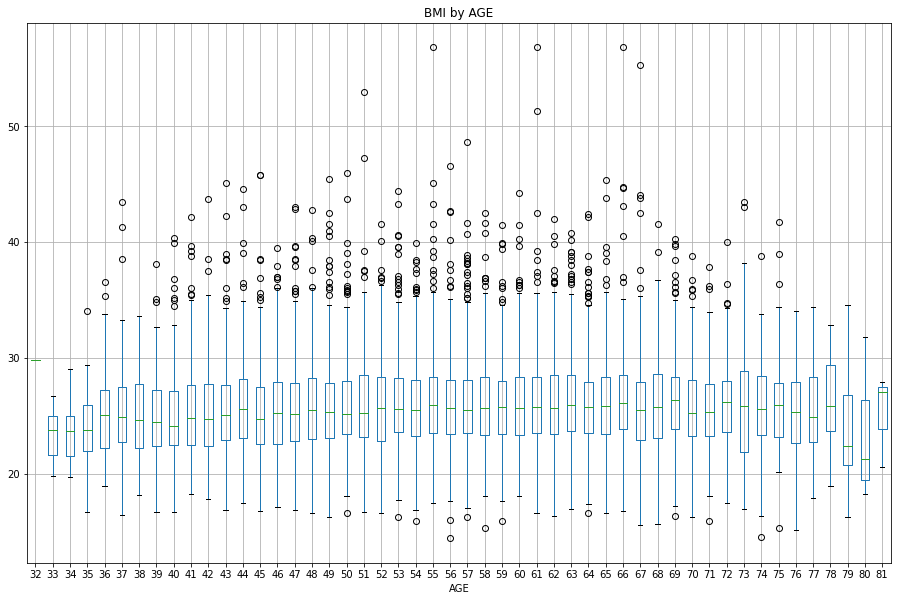

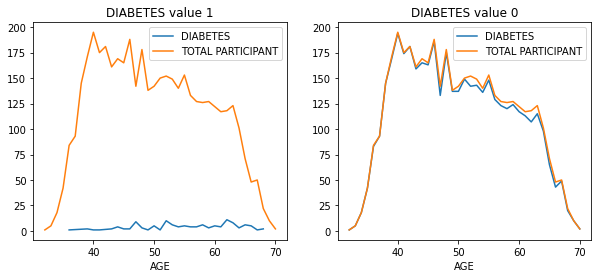

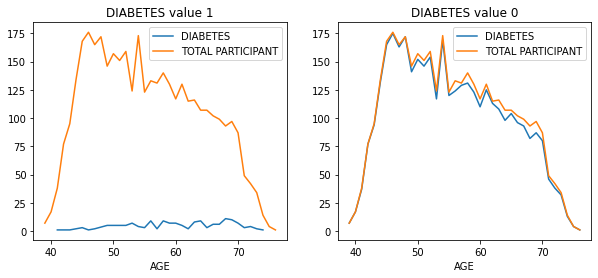

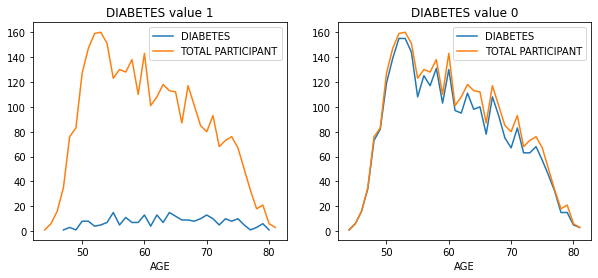

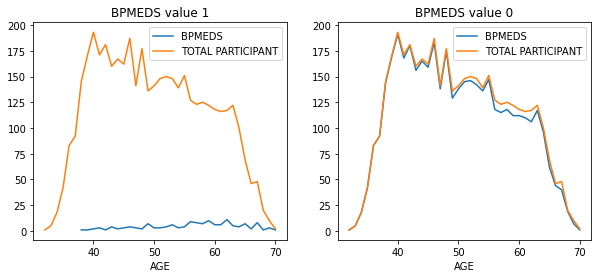

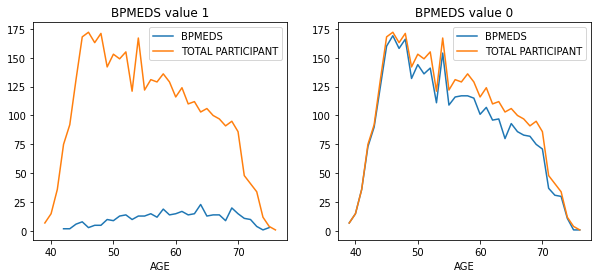

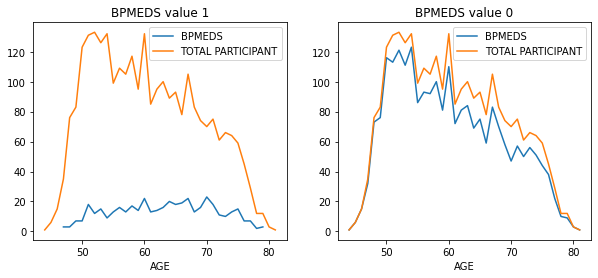

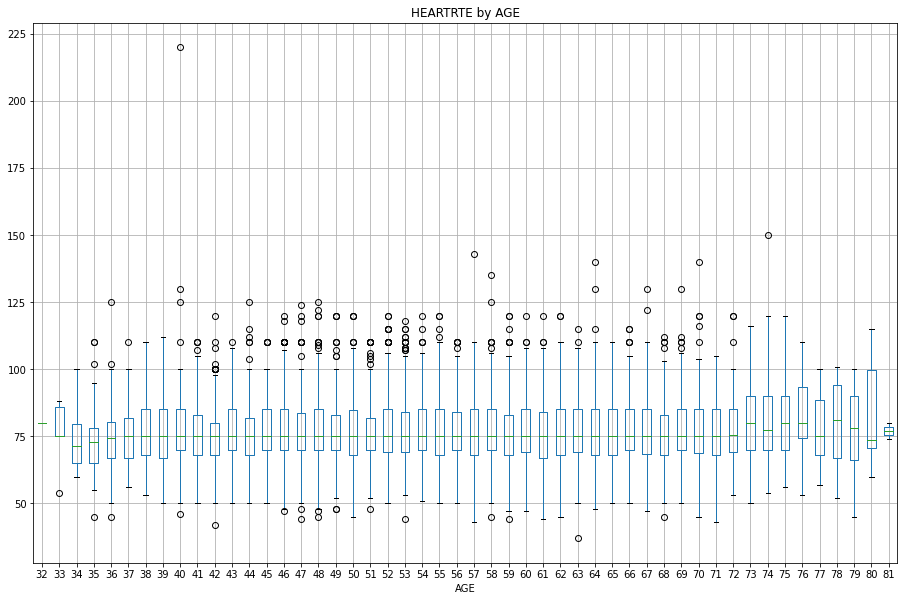

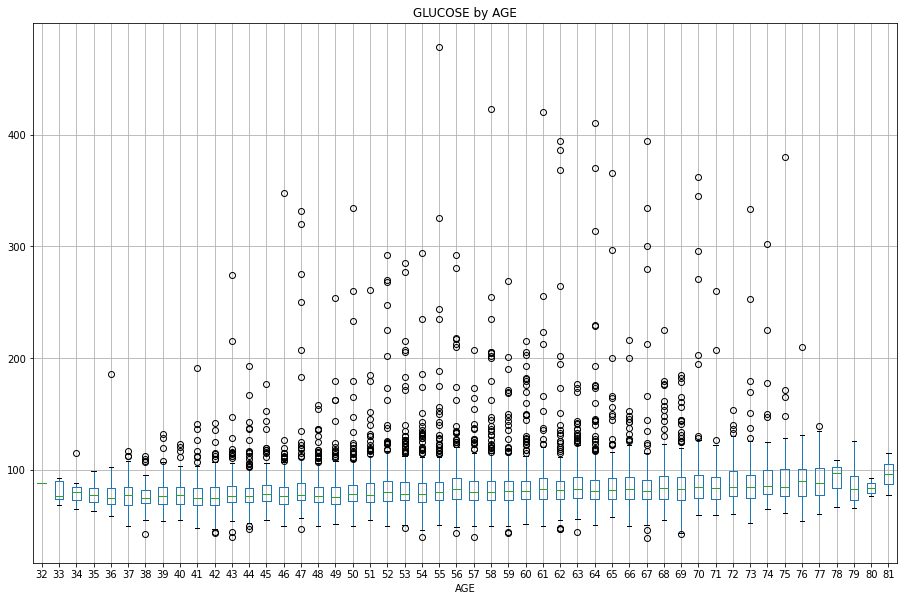

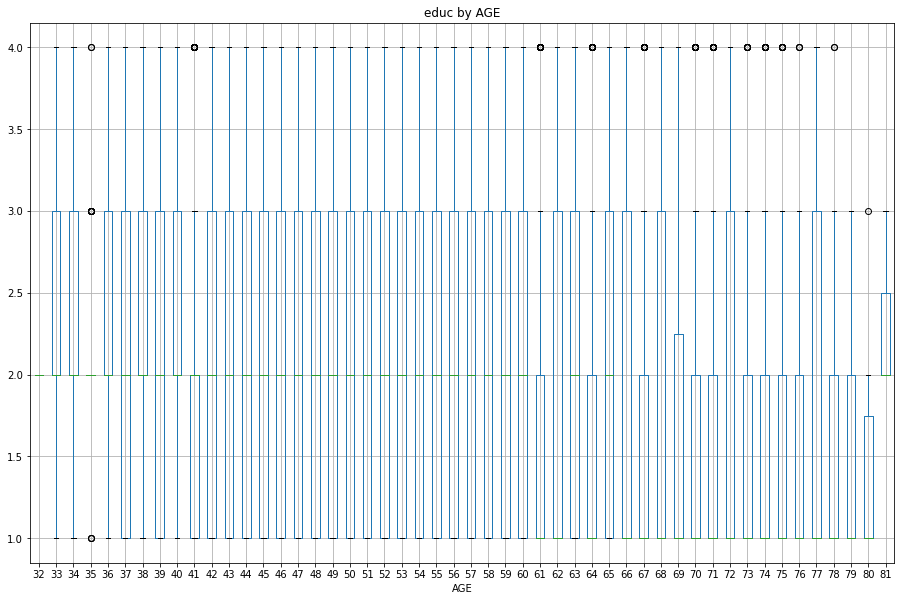

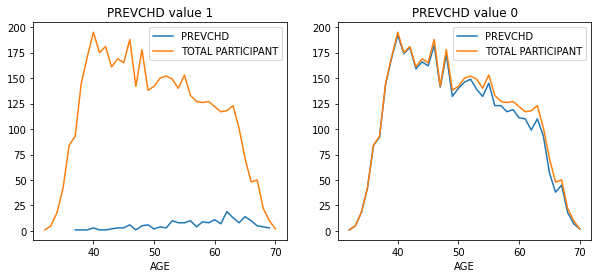

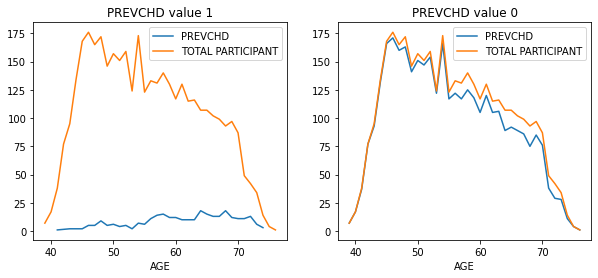

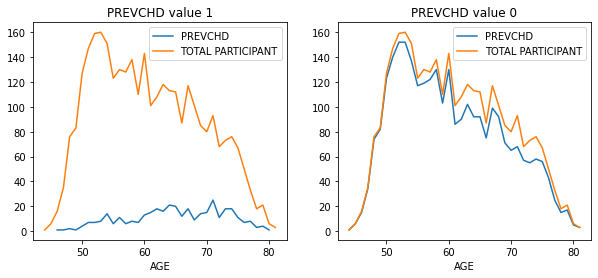

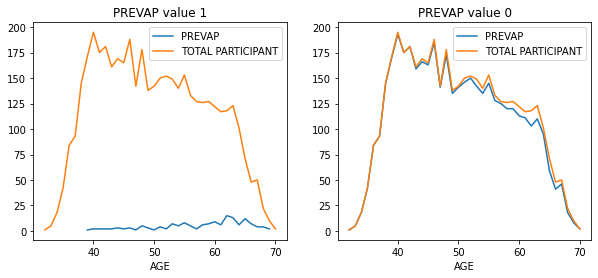

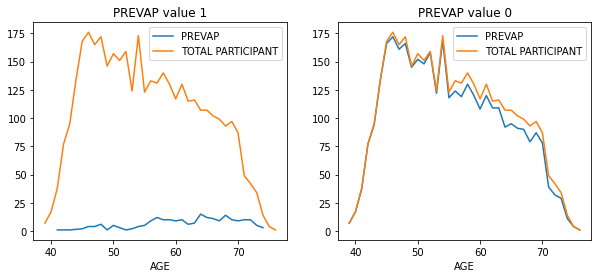

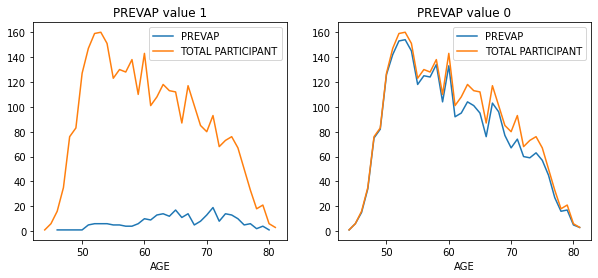

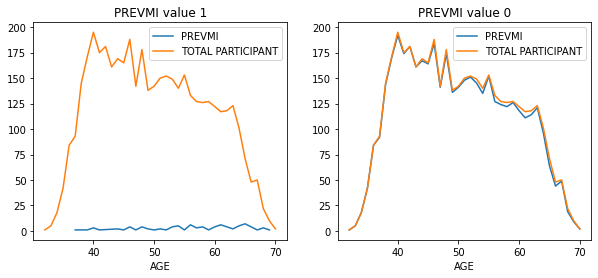

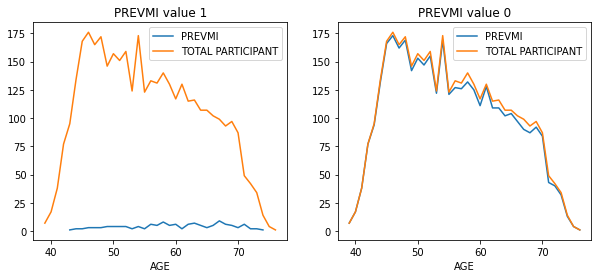

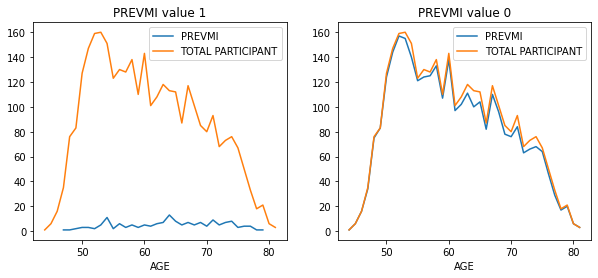

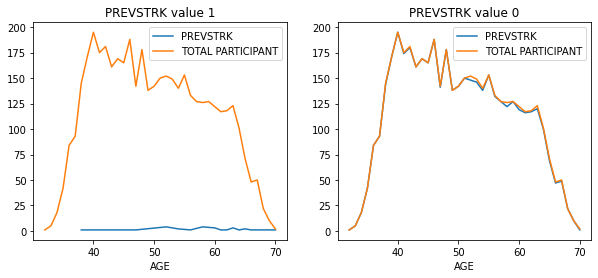

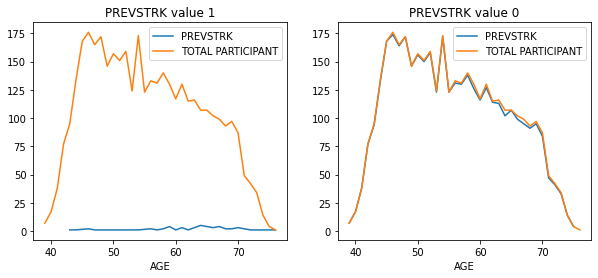

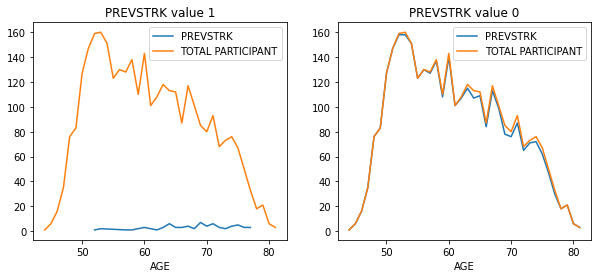

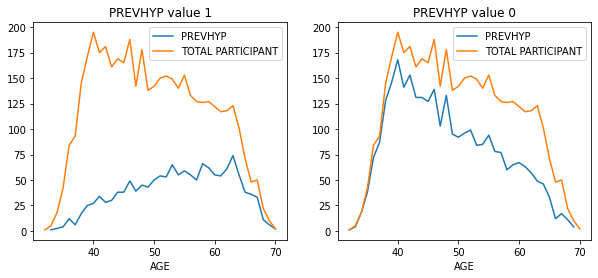

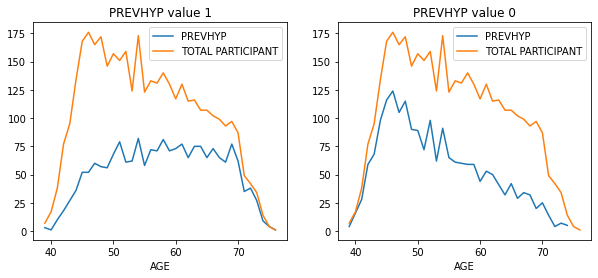

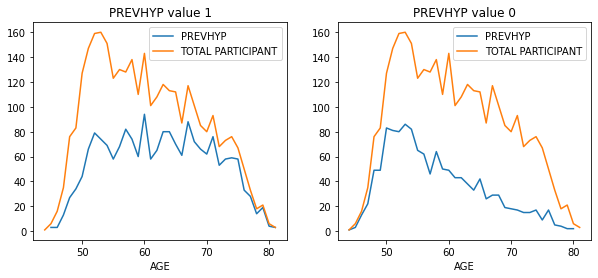

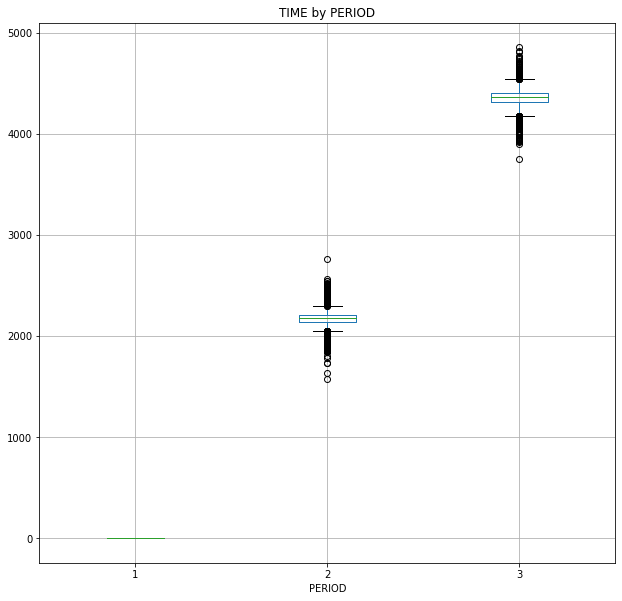

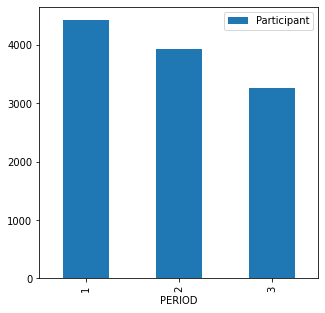

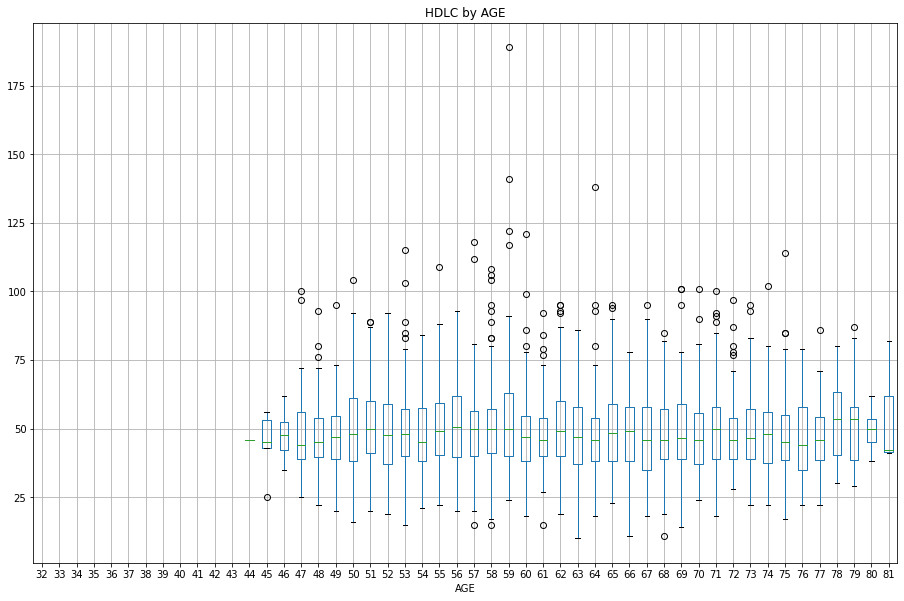

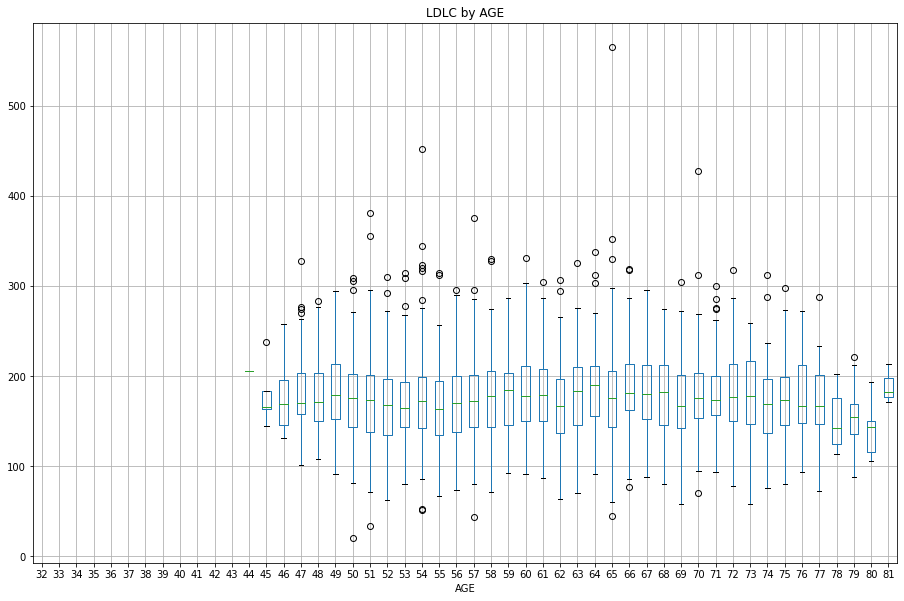

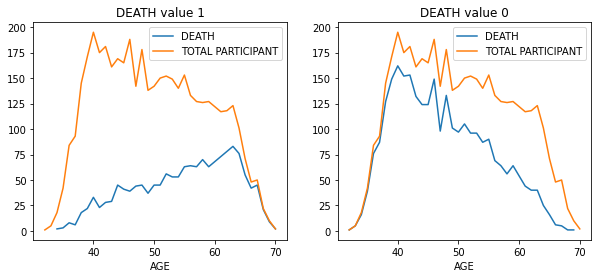

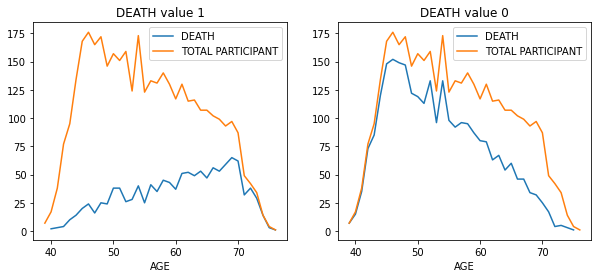

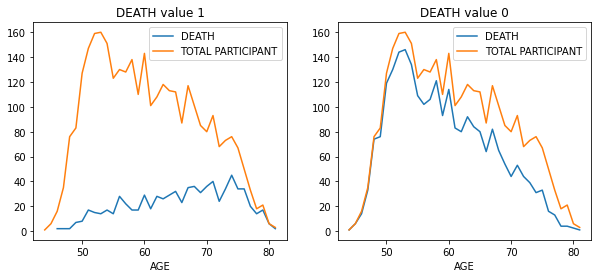

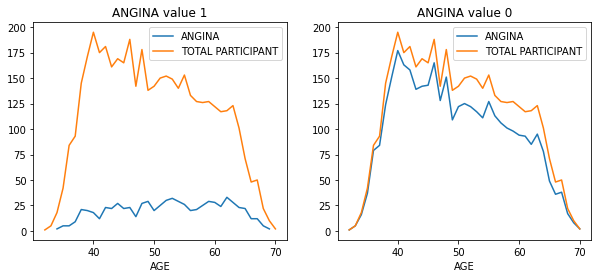

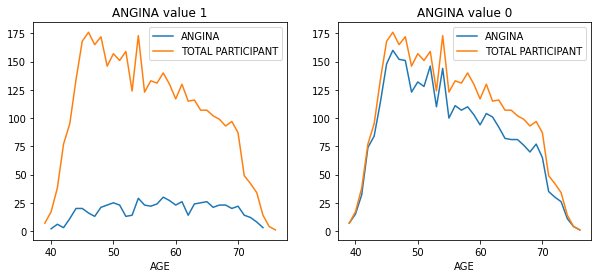

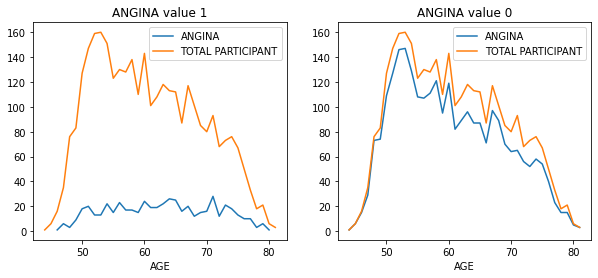

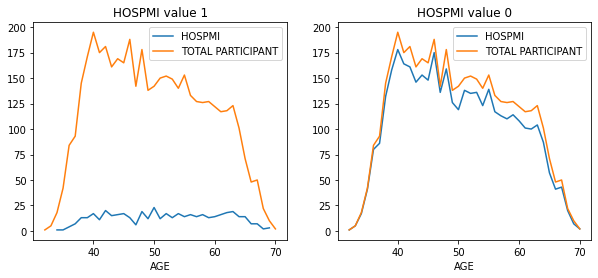

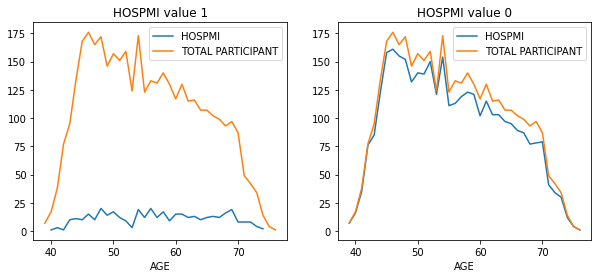

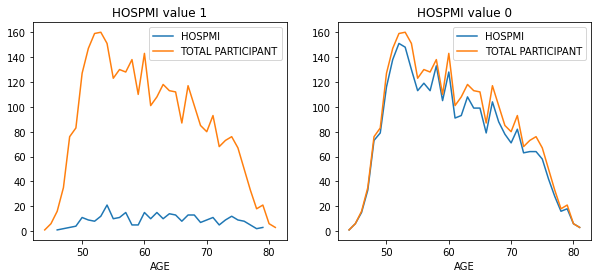

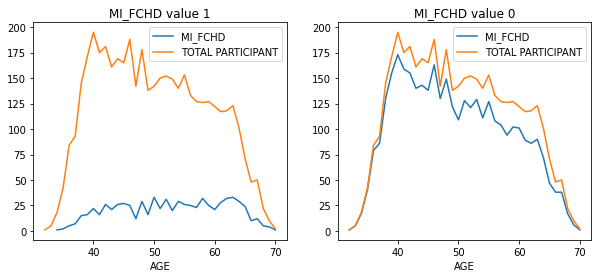

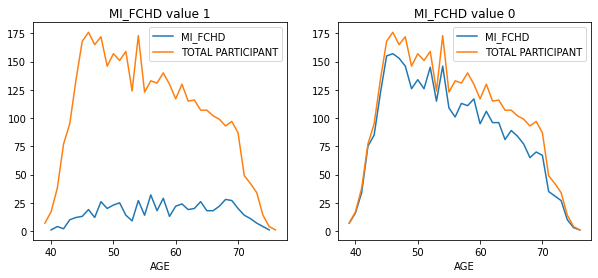

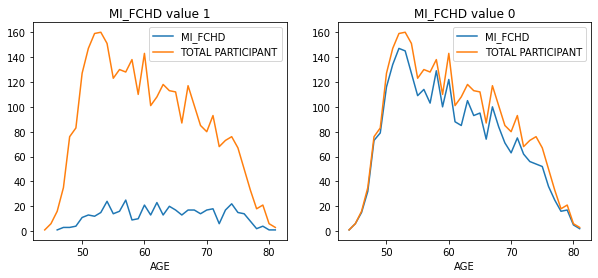

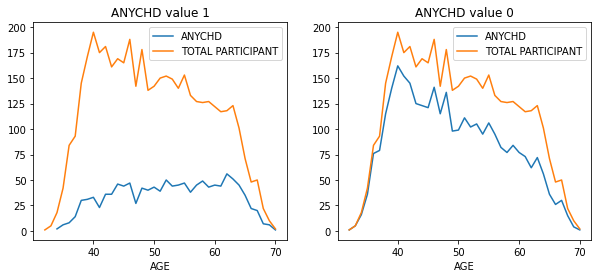

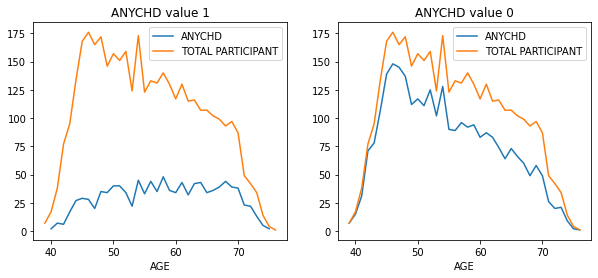

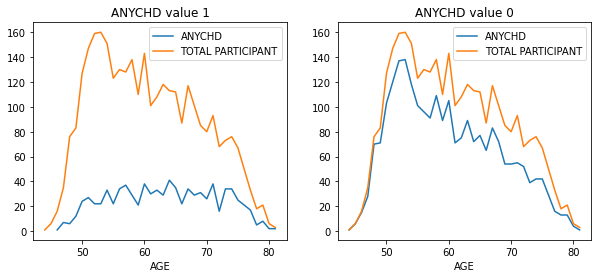

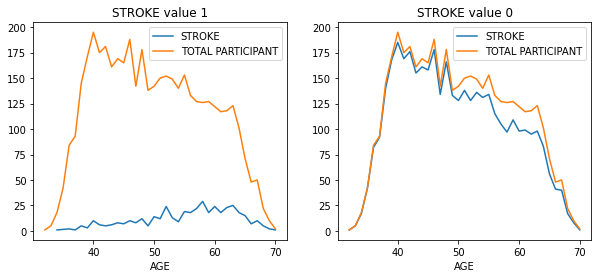

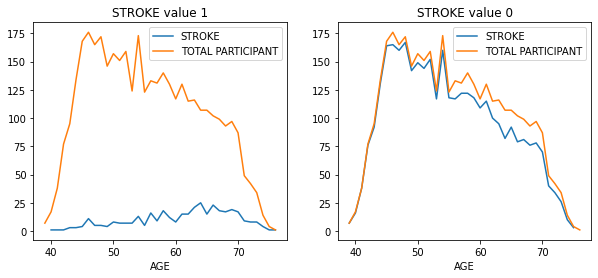

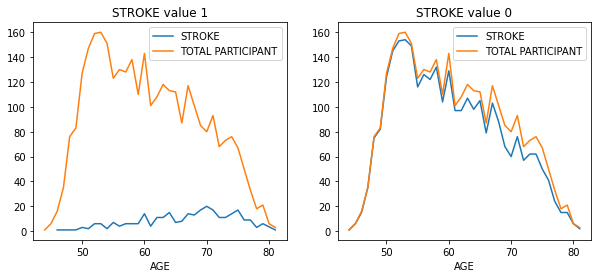

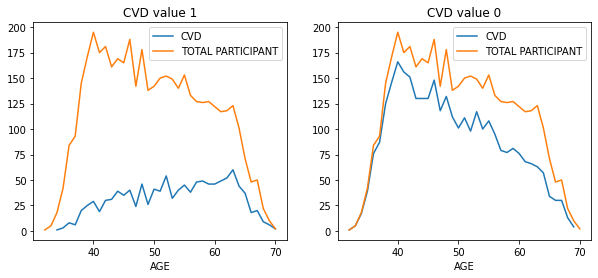

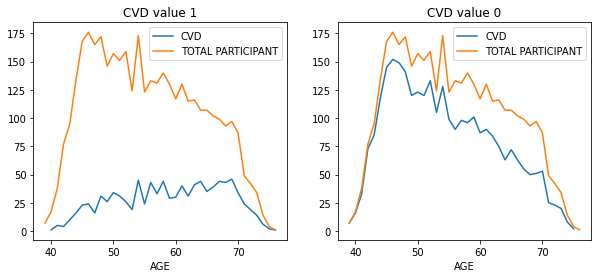

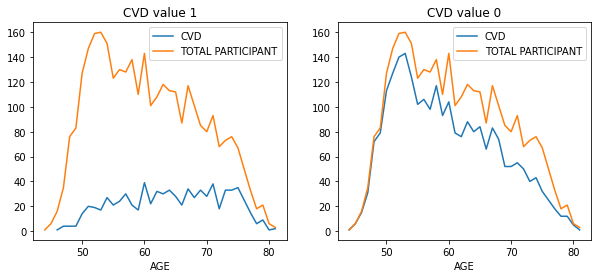

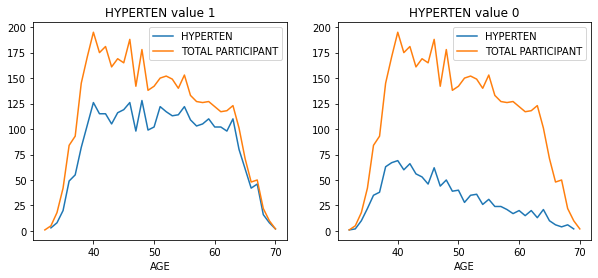

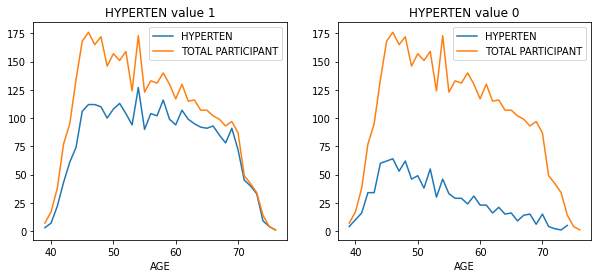

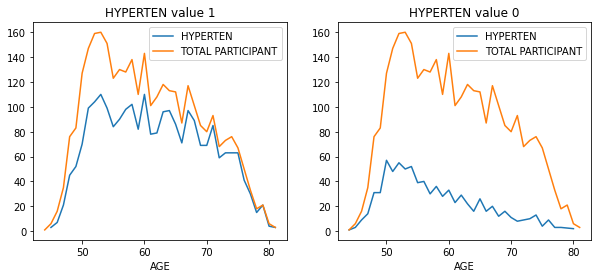

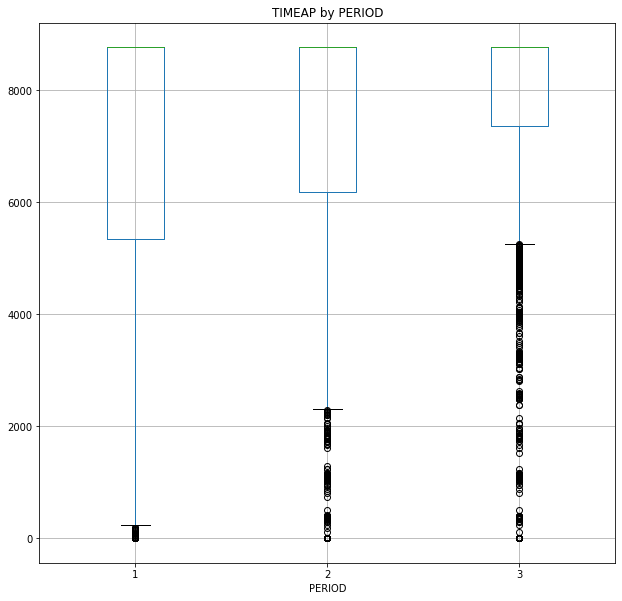

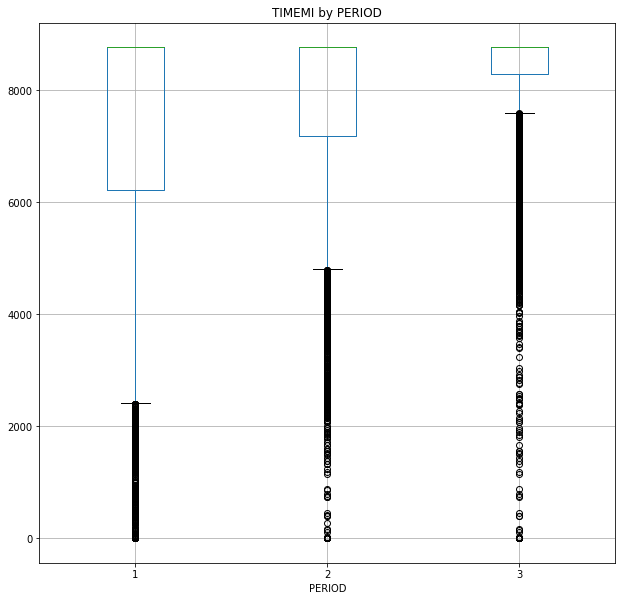

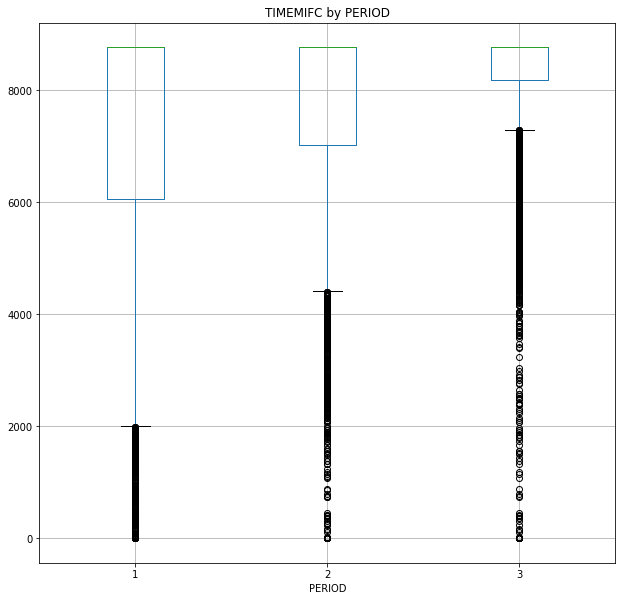

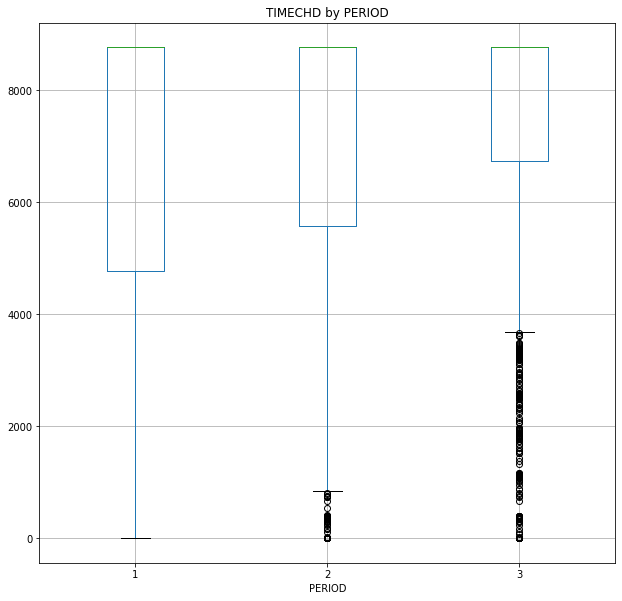

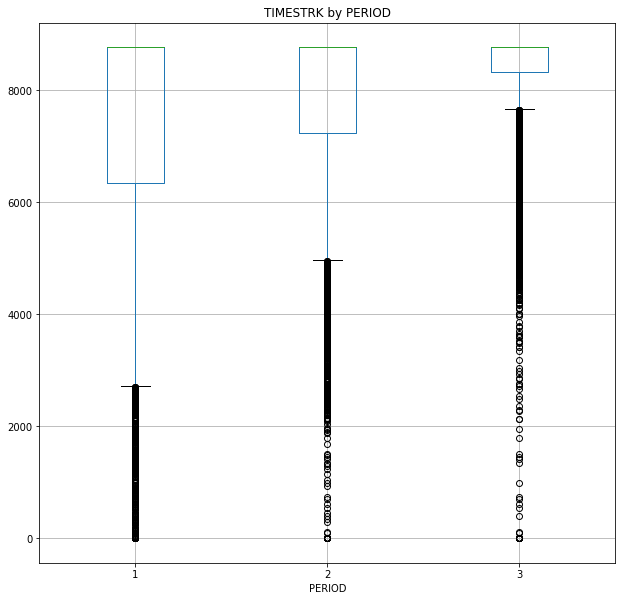

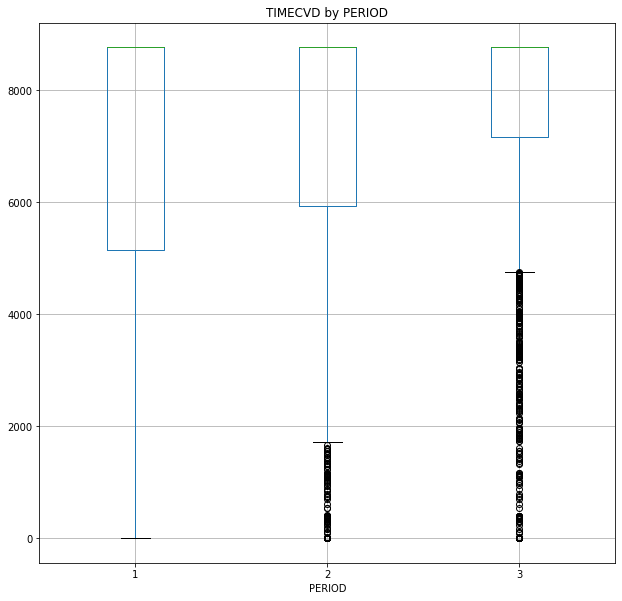

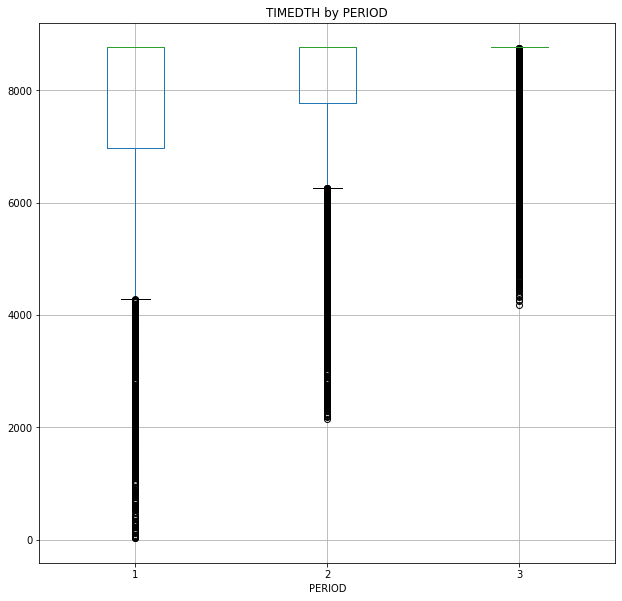

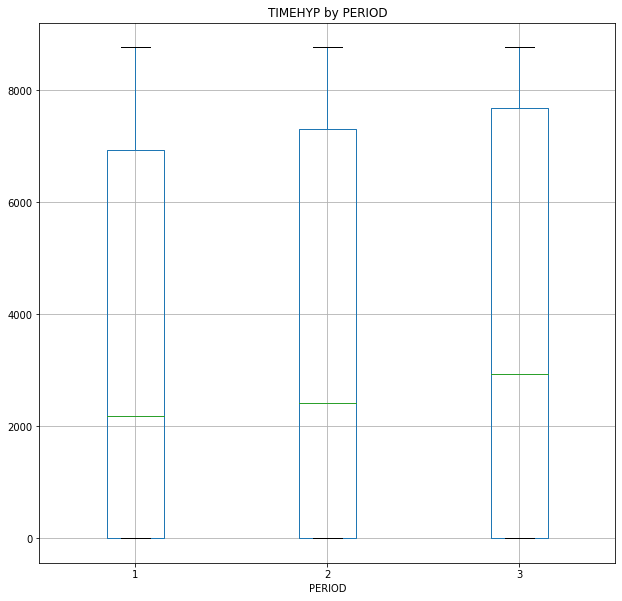

In [11]:
## TODO remove when analysis will be completed

no_need_to_visualized = ['AGE', 'RANDID']
binary_values = ['CURSMOKE', 'SEX', 'DIABETES', 'BPMEDS', 'PREVAP', 'PREVCHD', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'ANGINA', 'HOSPMI', 'MI_FCHD', 'ANYCHD', 'STROKE', 'CVD', 'HYPERTEN', 'DEATH']
bar_visualization = ['PERIOD']
time_data = ['TIME', 'TIMEAP', 'TIMEMI', 'TIMEMIFC', 'TIMECHD', 'TIMESTRK', 'TIMECVD', 'TIMEHYP', 'TIMEDTH']

for col_names in data.columns:
    if col_names in no_need_to_visualized:
        continue
        
    elif col_names in binary_values:
        for period in range(1,4):
            fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
            
            binary_data = data.loc[(data.PERIOD == period), ['AGE', col_names] ]
            ax2 = binary_data[binary_data[col_names] == 0].groupby('AGE').count().plot(ax=ax2)
            binary_data.groupby('AGE').count().plot(ax=ax2, title=col_names + " value 0", label="x")
            ax2.legend([col_names, "TOTAL PARTICIPANT"])

            binary_data = data.loc[(data.PERIOD == period), ['AGE', col_names] ]
            ax1 = binary_data[binary_data[col_names] == 1].groupby('AGE').count().plot(ax=ax1)
            binary_data.groupby('AGE').count().plot(ax=ax1, title=col_names + " value 1", label="x")
            ax1.legend([col_names, "TOTAL PARTICIPANT"])
                 
    elif col_names in bar_visualization:
        bar_visualization_data = data.loc[:, ['AGE', 'PERIOD'] ]
        ax = bar_visualization_data.groupby('PERIOD').count().plot(figsize=(5, 5), kind='bar')
        ax.legend(["Participant"])
        
    elif col_names in time_data:
        data.loc[:, ['PERIOD', col_names] ].boxplot(column=[col_names], by='PERIOD', figsize=(10, 10))
        plt.title(col_names + " by PERIOD")
        plt.suptitle('')
        
    else:
        data.loc[:, ['AGE', col_names] ].boxplot(column=[col_names], by='AGE', figsize=(15, 10))
        plt.title(col_names + " by AGE")
        plt.suptitle('')


In [12]:
## TODO remove when analysis will be completed
data[data.RANDID == 5601324]

RANDID  SEX  TOTCHOL  AGE  SYSBP  DIABP  CURSMOKE  CIGPDAY    BMI  \
6457  5601324    0    242.0   32  111.0   70.0         1     15.0  29.84   
6458  5601324    0    245.0   39  110.0   76.0         1     20.0  27.33   
6459  5601324    0    252.0   44  110.0   69.0         1     20.0  27.53   

      DIABETES  ...  CVD  HYPERTEN  TIMEAP  TIMEMI  TIMEMIFC  TIMECHD  \
6457         0  ...    0         0    8766    8766      8766     8766   
6458         0  ...    0         0    8766    8766      8766     8766   
6459         0  ...    0         0    8766    8766      8766     8766   

      TIMESTRK  TIMECVD  TIMEDTH  TIMEHYP  
6457      8766     8766     8766     8766  
6458      8766     8766     8766     8766  
6459      8766     8766     8766     8766  

[3 rows x 39 columns]

## Statistics parameters  <a name="stat_parameter">
    
[Data visualization analysis](#data_visualization_analysis)

* **Box plot** :
 - Q1 = first quartile
 - Q3 = third quartile
 - IQR = Q3 - Q1 (Interquartile range)
 - Min = Q1 - 1.5 IQR
 - Max = Q3 + 1.5 IQR
 - outliers are inferior to Q1 or superior to Q3

## - Experience analysis <a name="experience_analysis">

1. [Death representation](#death_representation)
2. [Gender, number of people and age](#general_informartion)
3. [Period](#period)
4. [Cholesterol rate](#cholesterol_rate)
5. [Systolic blood pressure](#systolic_blood_pressure)
6. [Diastolic blood pressure](#diastolic_blood_pressure)
7. [Anti-hypertensive medication](#anti_hypertensive_medication)
8. [current cigarette smoking](#current_cigarette_smoking)
9. [Number of cigarette per day](#cigarette_per_day)
10. [High density lipoprotein cholesterol](#hdlc)
11. [High density lipoprotein cholesterol](#ldlc)
12. [Body mass index](#bmi)
13. [Casual serum glucose](#glucose)
14. [Prevalent angina pectoris at exam](#prevap)
15. [Prevalent coronary heart disease](#prevchd)
16. [Prevalent myocardial infarction](#prevmi)
17. [Prevalent stroke](#prevstrk)
18. [Prevalent Hypertensive](#prevhyp)
    
[Data visualization analysis](#data_visualization_analysis)

In this dataset, there is two type of data. Booleans for events and numbers for measurements.

### Death representation <a name="death_representation">

[Experience analysis](#experience_analysis)

We wanted to compute the number of people who died between each period. We found that 4434 persons for the first period and 3930 persons for the second period.

Then we substracted the number of death people from the number of patients present in the period one. There is a difference between the number of people in period two and the number we computed. 

In [13]:
data.loc[(data.PERIOD == 1), ['SEX'] ].count().SEX

4434

In [14]:
data.loc[(data.PERIOD == 2), ['SEX'] ].count().SEX

3930

In [15]:
data.loc[(data.PERIOD == 1), ['SEX'] ].count().SEX - data.loc[(data.PERIOD == 1) & (data.DEATH == 1), ['DEATH'] ].count().DEATH

2884

Thanks to that we discovered the notation for death event is to report the event for each period if the person dies during the study.

In [16]:
# Count of death people that are not dead for another period

count = 0
for randid in data.loc[(data.DEATH == 1), ['RANDID']].RANDID:
    if data.loc[(data.DEATH == 0) & (data.RANDID == randid), :].shape[0] != 0:
        count += 1
print(count)

0


### Gender, number of people and age  <a name="general_informartion">

[Experience analysis](#experience_analysis)

In this dataset, there is 4434 in period 1, 3930 in period 2 and 3263 in period 3.
There is also 5022 men (43.19 %) and 6605 women (56.81 %). 

In [17]:
(5022 * 100) / 11627 , (6605 * 100) / 11627 

(43.19256902038359, 56.80743097961641)

The participants are between 32 to 81.

AGE  PERIOD
0       39       1
2       46       1
5       48       1
7       61       1
9       46       1
...    ...     ...
11613   48       1
11616   44       1
11619   52       1
11621   40       1
11624   39       1

[4434 rows x 2 columns]

AGE  PERIOD
3       46       2
6       48       2
8       61       2
10      45       2
13      43       2
...    ...     ...
11614   48       2
11617   44       2
11620   52       2
11622   40       2
11625   40       2

[3930 rows x 2 columns]

AGE  PERIOD
1       40       3
4       46       3
11      46       3
14      43       3
19      45       3
...    ...     ...
11612   51       3
11615   48       3
11618   44       3
11623   40       3
11626   38       3

[3263 rows x 2 columns]

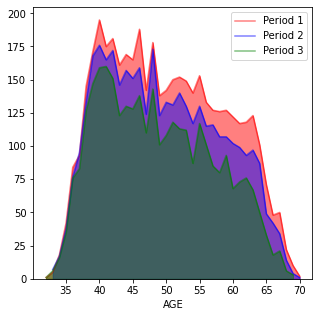

In [18]:
fig, ax = plt.subplots()
colors = ['r', 'b', 'g']
for period in range(1, 4):

    age_visualization_by_period = data.loc[data.PERIOD == period, ['AGE', 'PERIOD'] ]
    
    # Shift 6 years to compare the proportion of people 
    age_visualization_by_period['AGE'] = age_visualization_by_period['AGE'] - (6 * (period - 1) )
    display(age_visualization_by_period)
    
    ax = age_visualization_by_period.groupby('AGE').count().plot(ax = ax, figsize=(5, 5), kind='area', stacked=False, color = colors[period - 1])

ax.legend(["Period 1", "Period 2", "Period 3"])
plt.show()

### Period <a name="period">

[Experience analysis](#experience_analysis)

We wanted to calculate the average time interval between two periods : 

In [19]:
data.loc[(data.PERIOD == 2), ['TIME'] ].TIME.mean() / 365

5.959245703928334

In [20]:
(data.loc[(data.PERIOD == 3), ['TIME'] ].TIME.mean() - data.loc[(data.PERIOD == 2), ['TIME'] ].TIME.mean()) / 365

5.968617133447136

The time interval between 2 periods is on average **6 years**.

###  Systolic blood pressure  <a name="systolic_blood_pressure">
    
[Experience analysis](#experience_analysis)

In [64]:
col_name = 'SYSBP'

In [65]:
data.loc[:, ['AGE', col_name] ].SYSBP.describe()

count    11627.000000
mean       136.324116
std         22.798625
min         83.500000
25%        120.000000
50%        132.000000
75%        149.000000
max        295.000000
Name: SYSBP, dtype: float64

Text(0.5, 0.98, '')

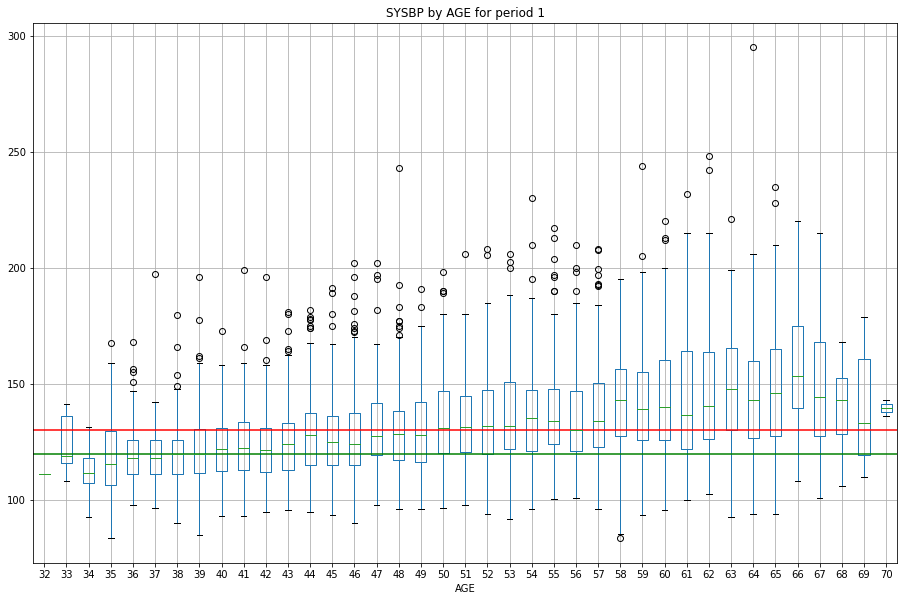

In [66]:
period = 1
data.loc[(data.PERIOD == period), ['AGE', col_name] ].boxplot(column=[col_name], by='AGE', figsize=(15, 10))
plt.axhline(y=120, color='g', linestyle='-')
plt.axhline(y=130, color='r', linestyle='-')
plt.title(col_name + " by AGE for period " + str(period))
plt.suptitle('')

Text(0.5, 0.98, '')

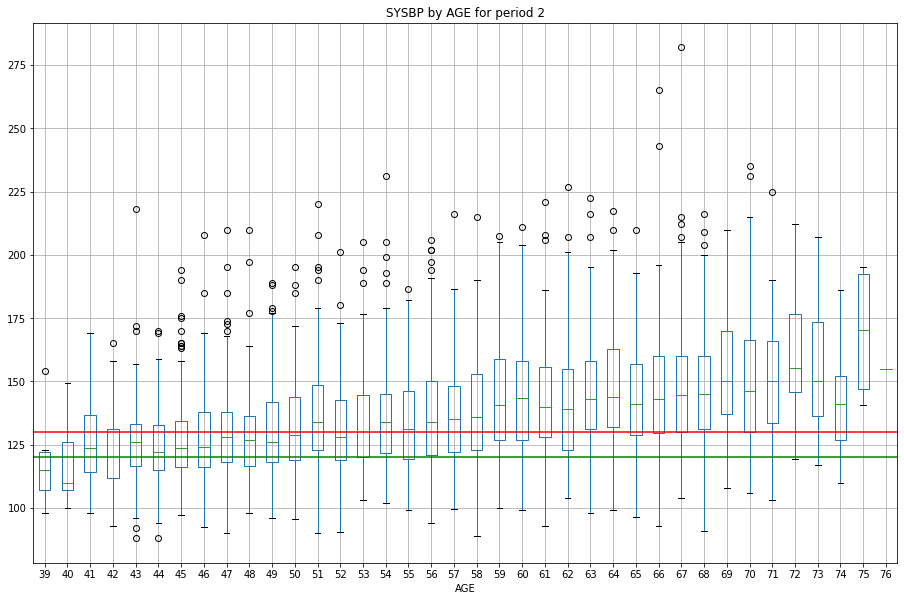

In [67]:
period = 2
data.loc[(data.PERIOD == period), ['AGE', col_name] ].boxplot(column=[col_name], by='AGE', figsize=(15, 10))
plt.axhline(y=120, color='g', linestyle='-')
plt.axhline(y=130, color='r', linestyle='-')
plt.title(col_name + " by AGE for period " + str(period))
plt.suptitle('')

Text(0.5, 0.98, '')

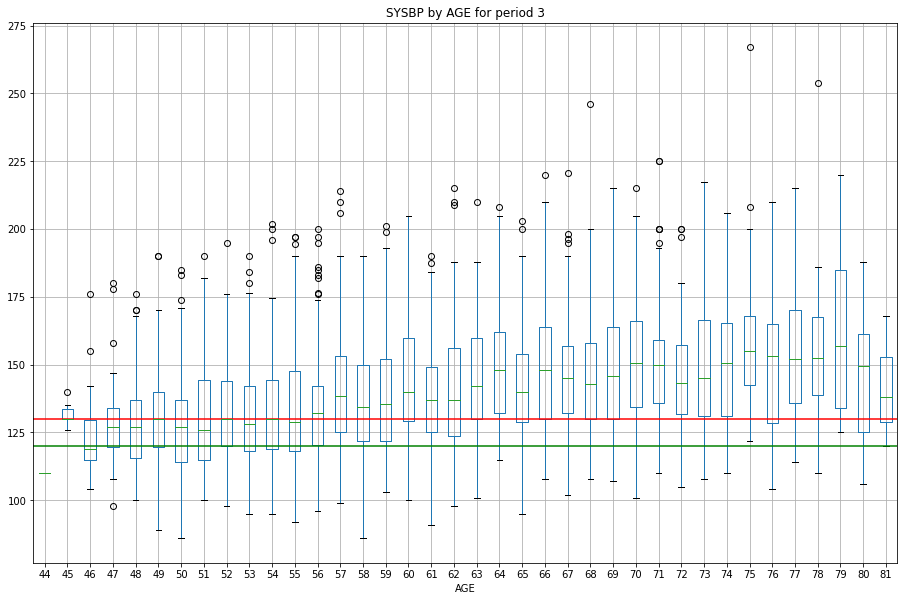

In [68]:
period=3
data.loc[(data.PERIOD == period), ['AGE', col_name] ].boxplot(column=[col_name], by='AGE', figsize=(15, 10))
plt.axhline(y=120, color='g', linestyle='-')
plt.axhline(y=130, color='r', linestyle='-')
plt.title(col_name + " by AGE for period " + str(period))
plt.suptitle('')

Source : https://www.cdc.gov/bloodpressure/about.htm

###  Diastolic blood pressure <a name="diastolic_blood_pressure">
    
[Experience analysis](#experience_analysis)

In [70]:
col_name = 'DIABP'

In [71]:
data.loc[:, ['AGE', col_name] ].DIABP.describe()

count    11627.000000
mean        83.037757
std         11.660144
min         30.000000
25%         75.000000
50%         82.000000
75%         90.000000
max        150.000000
Name: DIABP, dtype: float64

Text(0.5, 0.98, '')

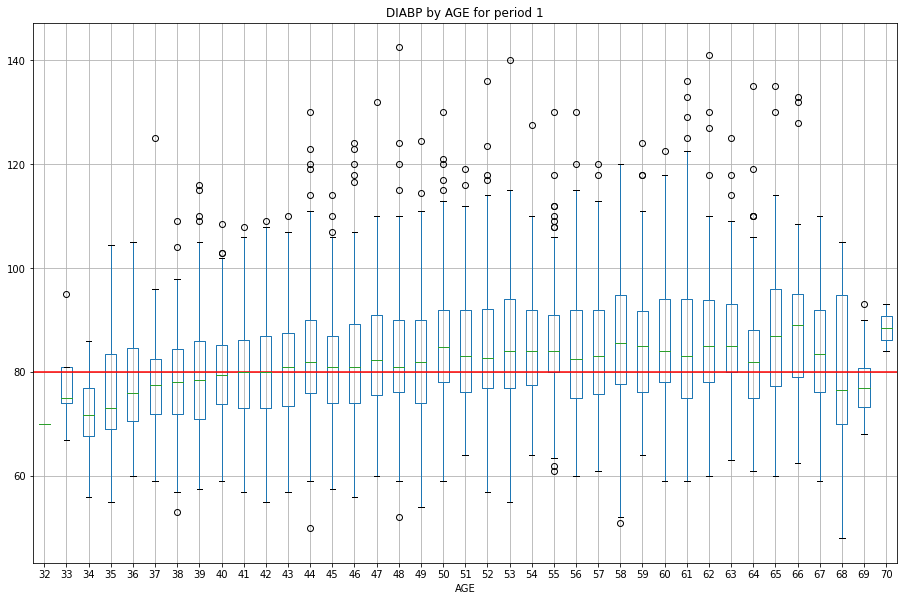

In [72]:
period = 1
data.loc[(data.PERIOD == period), ['AGE', col_name] ].boxplot(column=[col_name], by='AGE', figsize=(15, 10))
plt.axhline(y=80, color='r', linestyle='-')
plt.title(col_name + " by AGE for period " + str(period))
plt.suptitle('')

Text(0.5, 0.98, '')

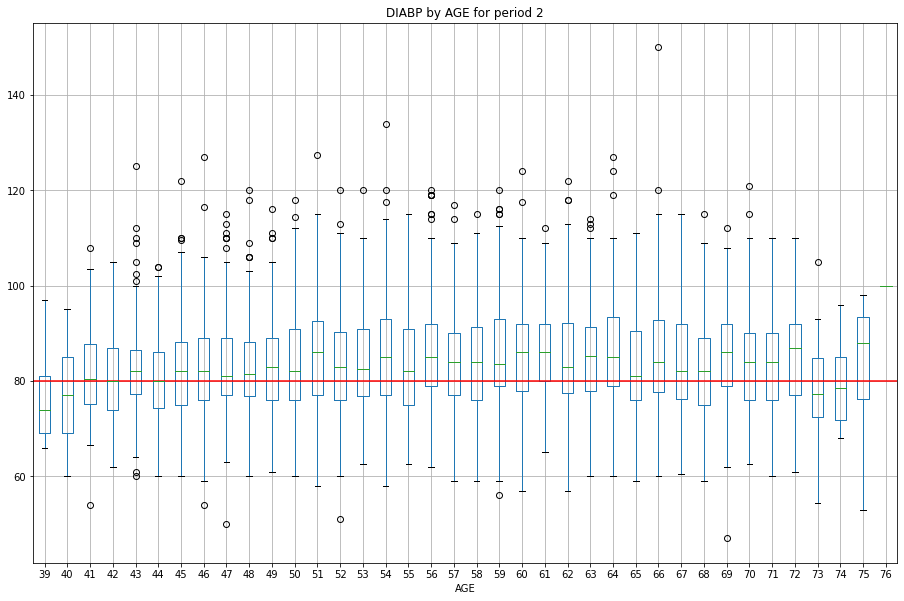

In [73]:
period = 2
data.loc[(data.PERIOD == period), ['AGE', col_name] ].boxplot(column=[col_name], by='AGE', figsize=(15, 10))
plt.axhline(y=80, color='r', linestyle='-')
plt.title(col_name + " by AGE for period " + str(period))
plt.suptitle('')

Text(0.5, 0.98, '')

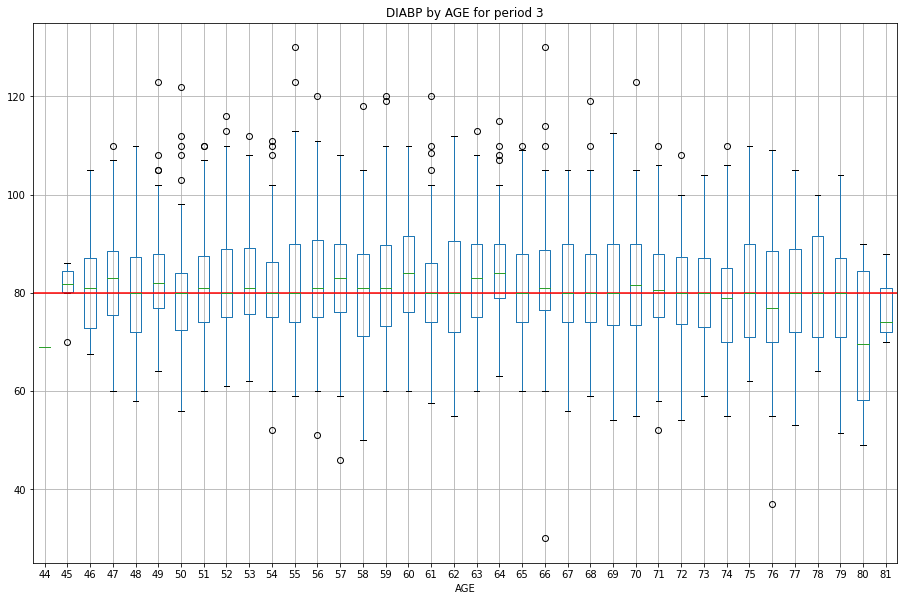

In [74]:
period = 3
data.loc[(data.PERIOD == period), ['AGE', col_name] ].boxplot(column=[col_name], by='AGE', figsize=(15, 10))
plt.axhline(y=80, color='r', linestyle='-')
plt.title(col_name + " by AGE for period " + str(period))
plt.suptitle('')

###  Use of anti-hypertensive medication <a name="anti_hypertensive_medication">
    
[Experience analysis](#experience_analysis)

In [76]:
col_name = 'BPMEDS'

In [81]:
data.loc[:, ['AGE', col_name] ].BPMEDS.mean()

0.08555374297625522

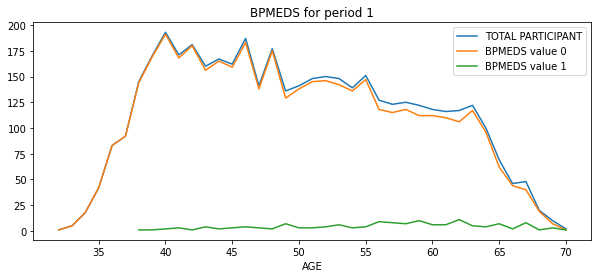

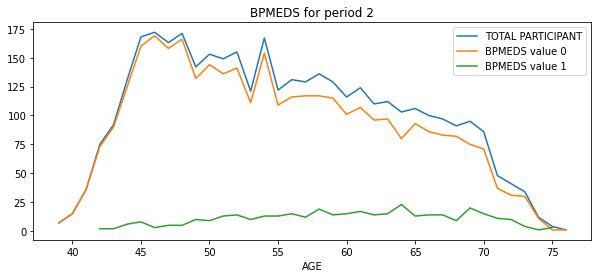

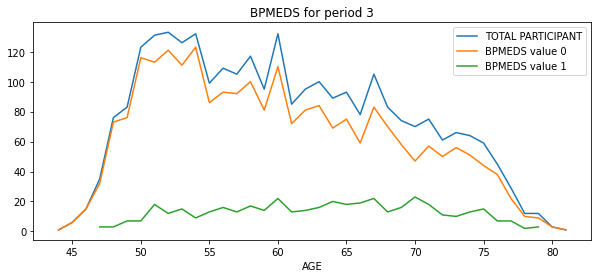

In [83]:
for period in range(1,4):
    fig, (ax1) = plt.subplots(figsize=(10,4))

    binary_data = data.loc[(data.PERIOD == period), ['AGE', col_name] ]
    
    ax1 = binary_data.groupby('AGE').count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 0].groupby('AGE').count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 1].groupby('AGE').count().plot(ax=ax1, title = col_name + " for period " + str(period))

    ax1.legend(["TOTAL PARTICIPANT", col_name + " value 0", col_name + " value 1"])
    ax1
    plt.show()

###  Current cigarette smoking <a name="current_cigarette_smoking">
    
[Experience analysis](#experience_analysis)

In [84]:
col_name = 'CURSMOKE'

In [93]:
data.loc[:, ['AGE', col_name] ].CURSMOKE.mean()

0.43252773716349874

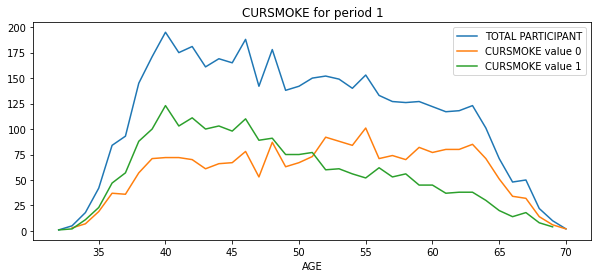

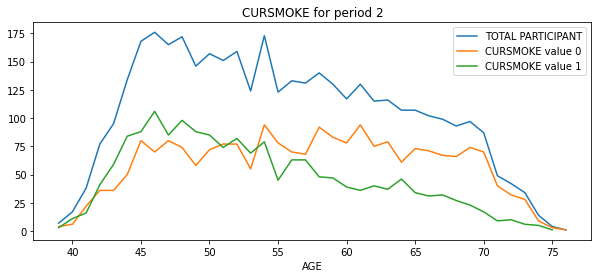

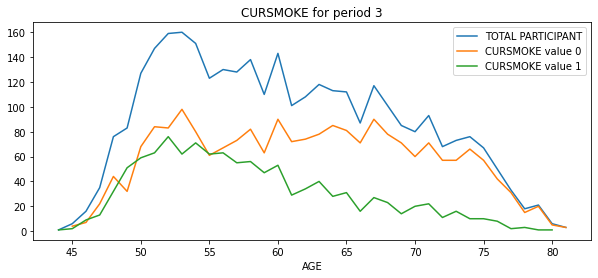

In [94]:
for period in range(1,4):
    fig, (ax1) = plt.subplots(figsize=(10,4))

    binary_data = data.loc[(data.PERIOD == period), ['AGE', col_name] ]
    
    ax1 = binary_data.groupby('AGE').count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 0].groupby('AGE').count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 1].groupby('AGE').count().plot(ax=ax1, title = col_name + " for period " + str(period))

    ax1.legend(["TOTAL PARTICIPANT", col_name + " value 0", col_name + " value 1"])
    plt.show()

###  Number of cigarette per day <a name="cigarette_per_day">
    
[Experience analysis](#experience_analysis)

In [96]:
col_name = 'CIGPDAY'

In [97]:
data.loc[:, ['AGE', col_name] ].CIGPDAY.describe()

count    11548.000000
mean         8.250346
std         12.186888
min          0.000000
25%          0.000000
50%          0.000000
75%         20.000000
max         90.000000
Name: CIGPDAY, dtype: float64

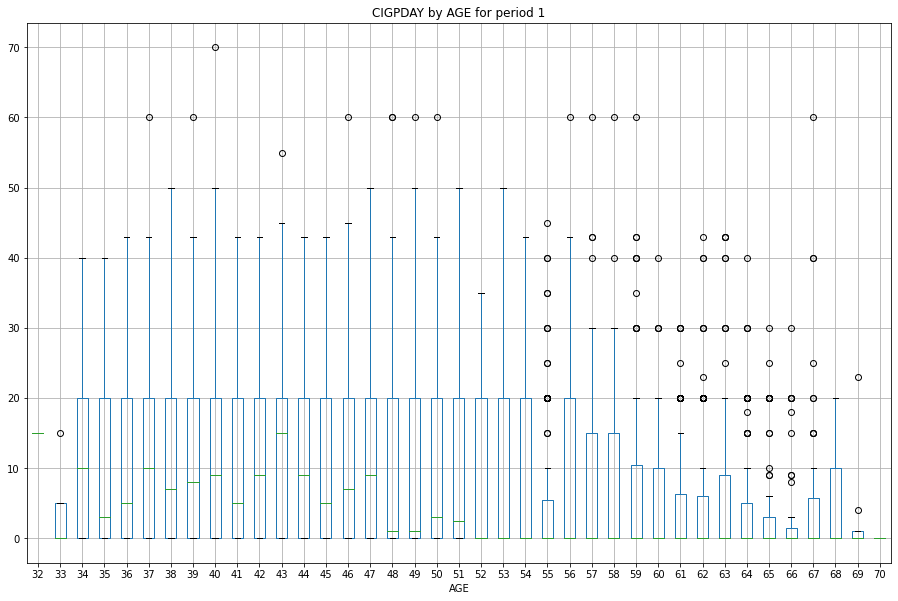

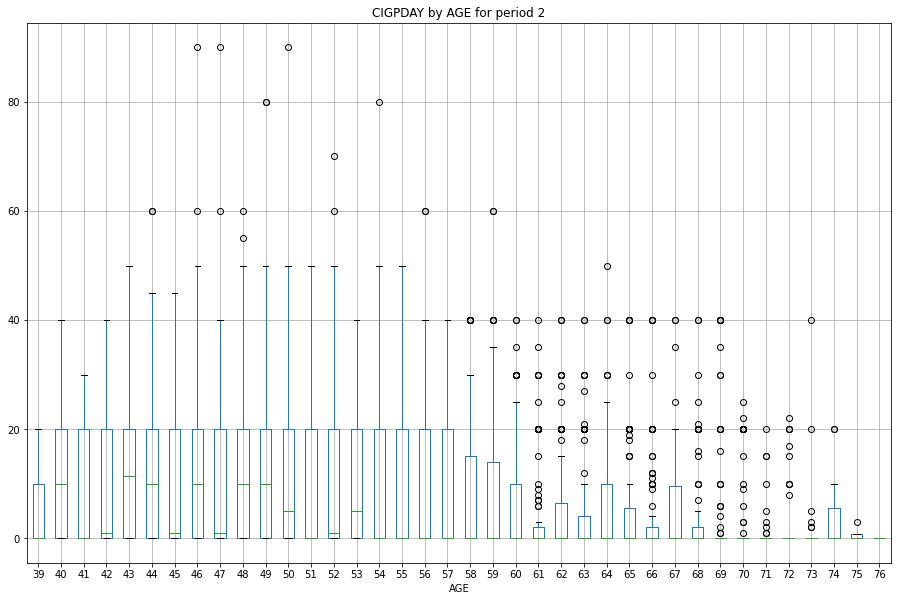

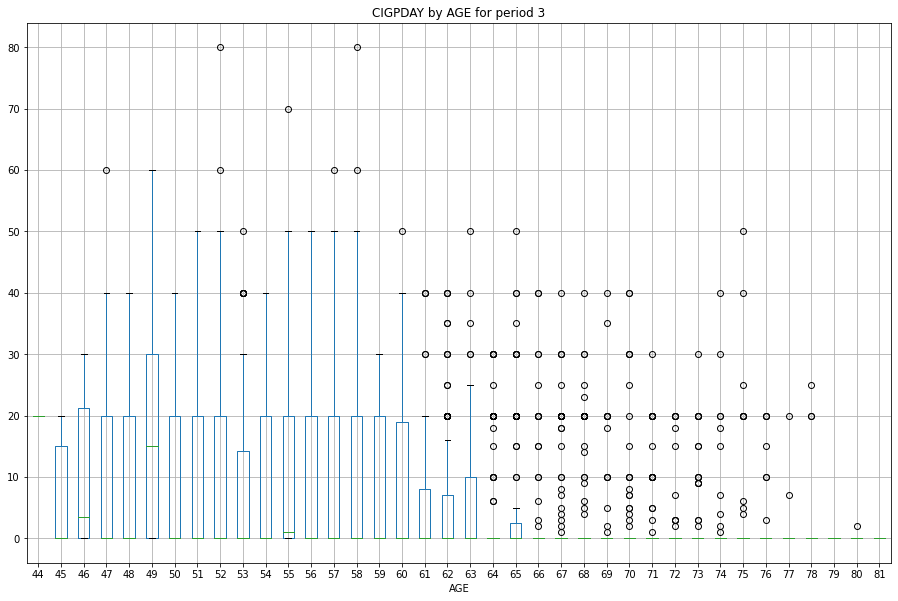

In [61]:
for period in range(1, 4):
    data.loc[(data.PERIOD == period), ['AGE', col_name] ].boxplot(column=[col_name], by='AGE', figsize=(15, 10))
    #plt.axhline(y=125, color='r', linestyle='-')
    #plt.axhline(y=200, color='r', linestyle='-')
    plt.title(col_name + " by AGE for period " + str(period))
    plt.suptitle('')

### Cholesterol rate <a name="cholesterol_rate">
    
[Experience analysis](#experience_analysis)

In [37]:
col_name = 'TOTCHOL'

In [38]:
data.loc[:, ['AGE', col_name] ].TOTCHOL.describe()

count    11218.000000
mean       241.162418
std         45.368030
min        107.000000
25%        210.000000
50%        238.000000
75%        268.000000
max        696.000000
Name: TOTCHOL, dtype: float64

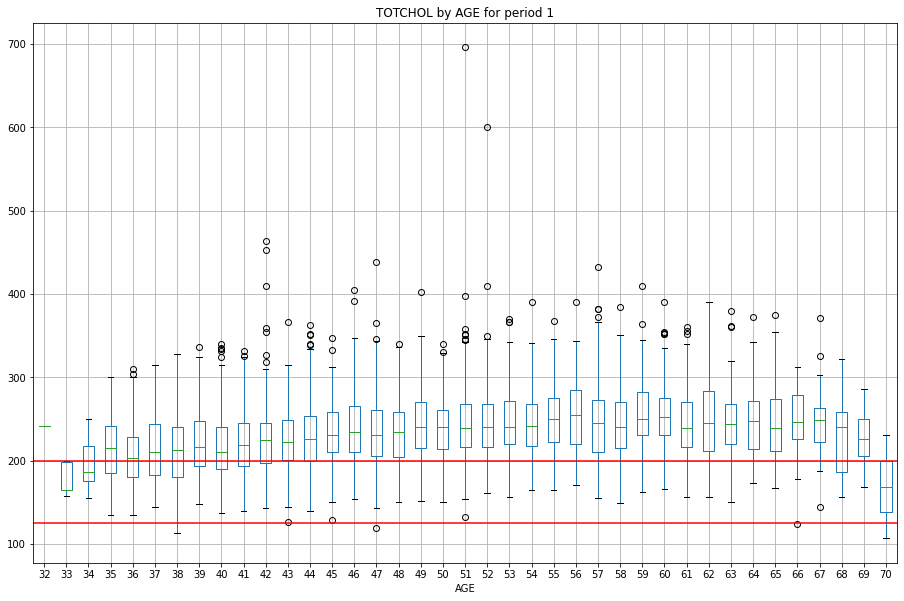

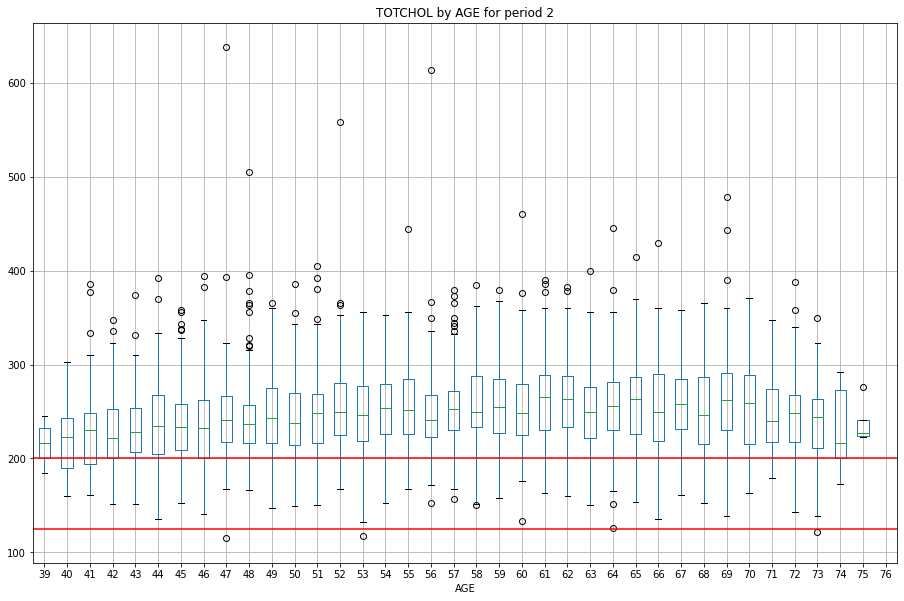

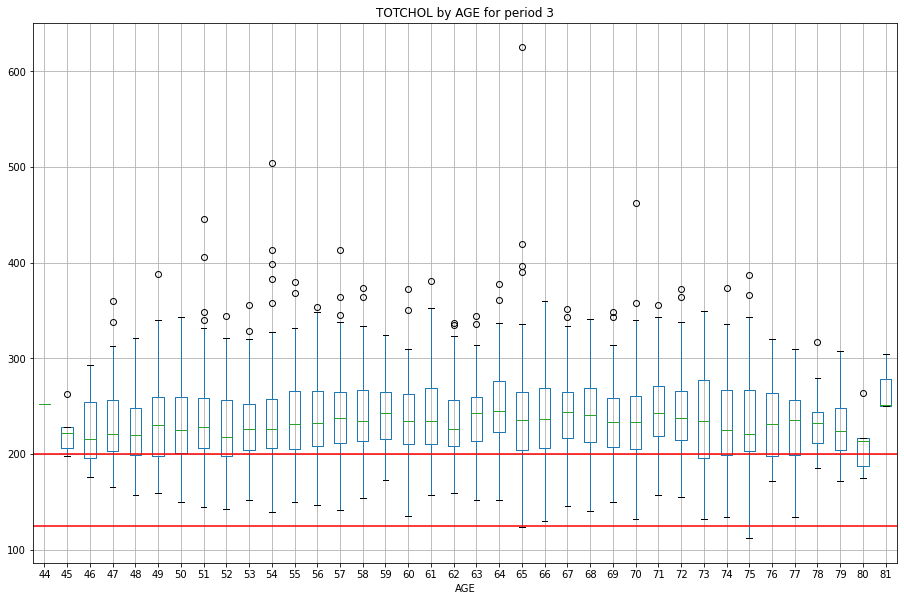

In [39]:
for period in range(1, 4):
    data.loc[(data.PERIOD == period), ['AGE', col_name] ].boxplot(column=[col_name], by='AGE', figsize=(15, 10))
    plt.axhline(y=125, color='r', linestyle='-')
    plt.axhline(y=200, color='r', linestyle='-')
    plt.title(col_name + " by AGE for period " + str(period))
    plt.suptitle('')

Normal rate cholesterol people older than 20 is 125 to 200 mg/dL. 

- TODO

Source : https://medlineplus.gov/cholesterollevelswhatyouneedtoknow.html

###  High density lipoprotein cholesterol <a name="hdlc">
    
Measurement unit : **mg/dL**
Available for period 3 only
    
[Experience analysis](#experience_analysis)

In [104]:
col_name = 'HDLC'

In [105]:
data.loc[:, ['AGE', col_name] ].HDLC.describe()

count    3027.000000
mean       49.364718
std        15.626669
min        10.000000
25%        39.000000
50%        48.000000
75%        58.000000
max       189.000000
Name: HDLC, dtype: float64

Text(0.5, 0.98, '')

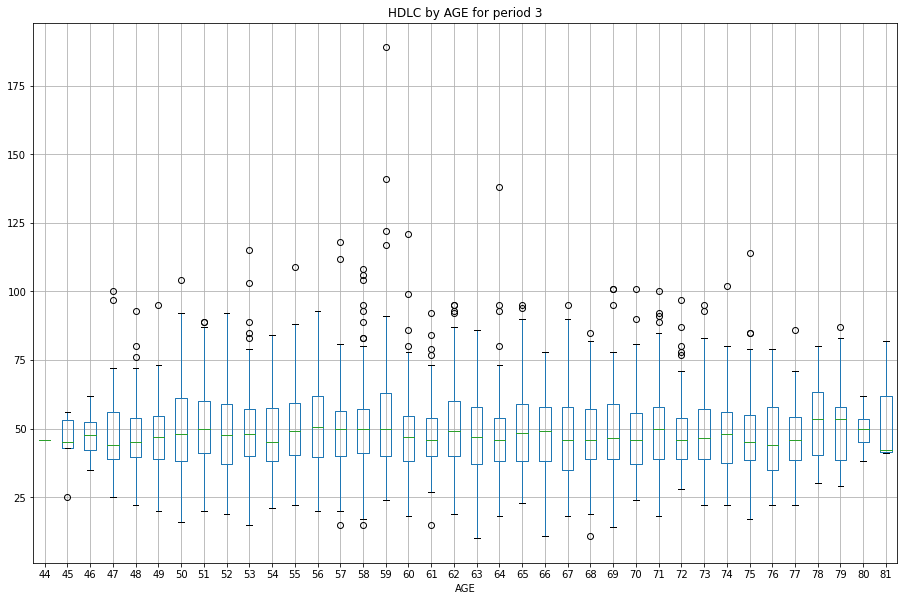

In [107]:
period = 3
data.loc[(data.PERIOD == period), ['AGE', col_name] ].boxplot(column=[col_name], by='AGE', figsize=(15, 10))
plt.title(col_name + " by AGE for period " + str(period))
plt.suptitle('')

###  Low density lipoprotein cholesterol <a name="ldlc">
    
Measurement unit : **mg/dL**
Available for period 3 only
    
[Experience analysis](#experience_analysis)

In [108]:
col_name = 'LDLC'

In [109]:
data.loc[:, ['AGE', col_name] ].LDLC.describe()

count    3026.000000
mean      176.466953
std        46.863393
min        20.000000
25%       145.000000
50%       173.000000
75%       205.000000
max       565.000000
Name: LDLC, dtype: float64

Text(0.5, 0.98, '')

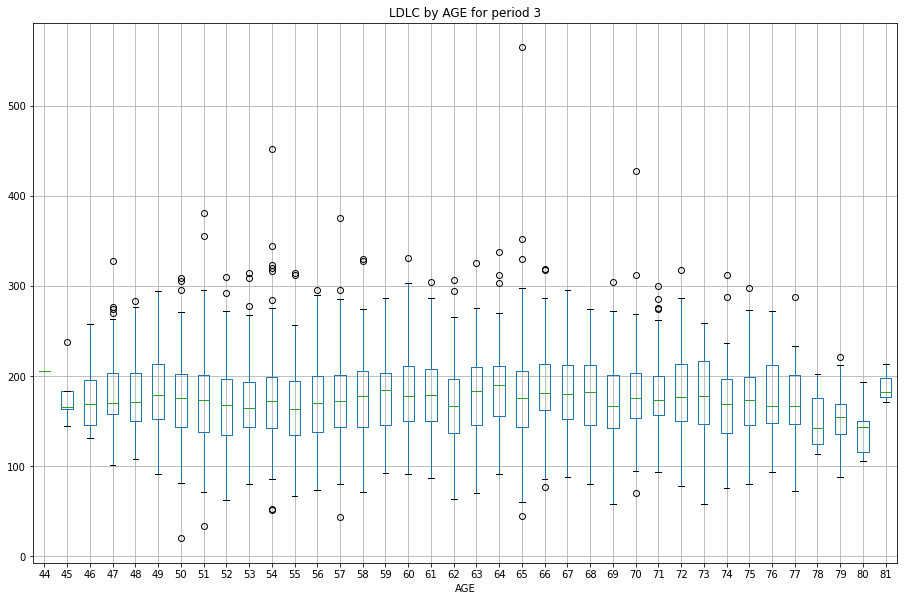

In [110]:
period = 3
data.loc[(data.PERIOD == period), ['AGE', col_name] ].boxplot(column=[col_name], by='AGE', figsize=(15, 10))
plt.title(col_name + " by AGE for period " + str(period))
plt.suptitle('')

###  Body mass index <a name="bmi">
    
BMI = weight[kg]/height²[m²]
    
[Experience analysis](#experience_analysis)

In [111]:
col_name = 'BMI'

In [112]:
data.loc[:, ['AGE', col_name] ].BMI.describe()

count    11575.000000
mean        25.877349
std          4.102640
min         14.430000
25%         23.095000
50%         25.480000
75%         28.070000
max         56.800000
Name: BMI, dtype: float64

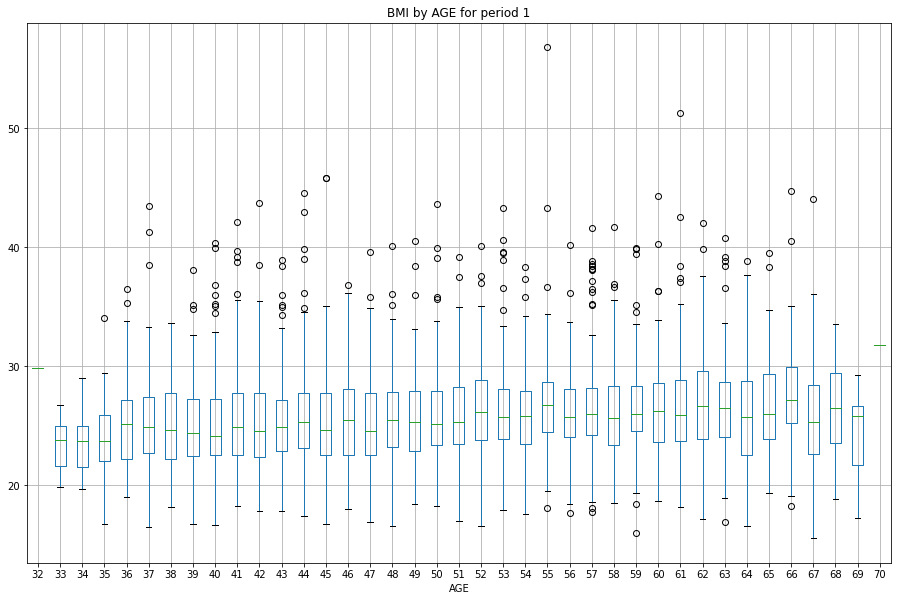

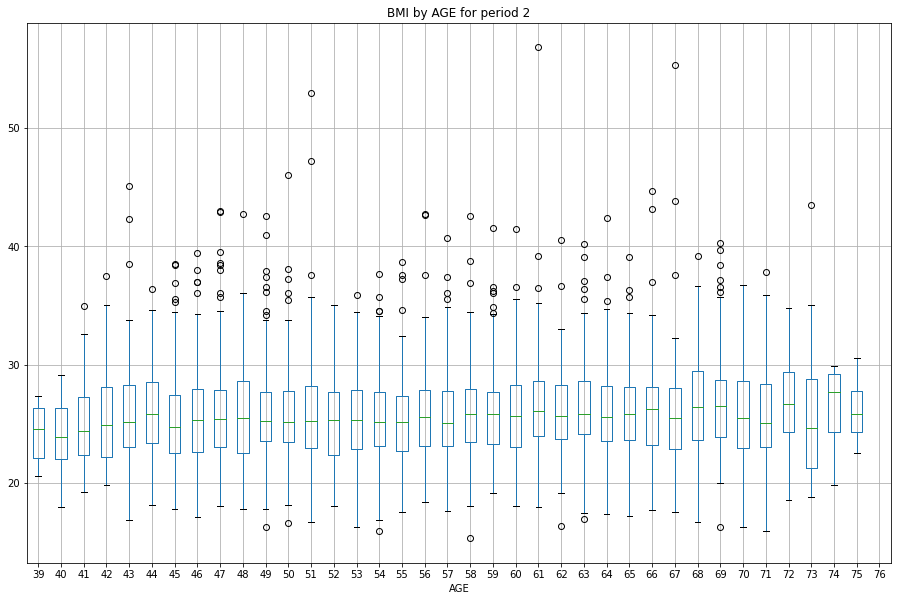

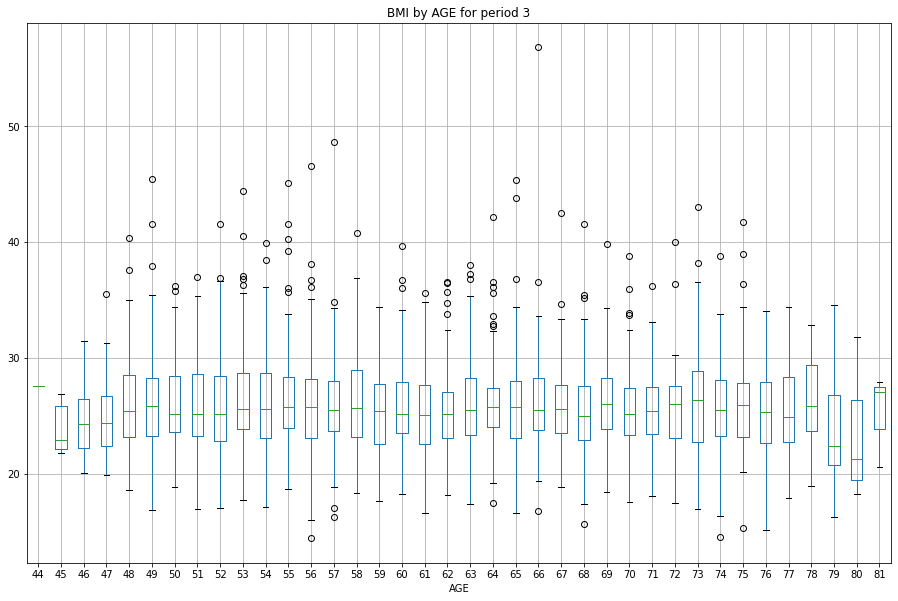

In [113]:
for period in range(1, 4):
    data.loc[(data.PERIOD == period), ['AGE', col_name] ].boxplot(column=[col_name], by='AGE', figsize=(15, 10))
    plt.title(col_name + " by AGE for period " + str(period))
    plt.suptitle('')

###  Casual serum glucose <a name="glucose">
    
Measurement unit : **mg/dL**
    
[Experience analysis](#experience_analysis)

In [114]:
col_name = 'GLUCOSE'

In [115]:
data.loc[:, ['AGE', col_name] ].GLUCOSE.describe()

count    10187.000000
mean        84.124865
std         24.993781
min         39.000000
25%         72.000000
50%         80.000000
75%         89.000000
max        478.000000
Name: GLUCOSE, dtype: float64

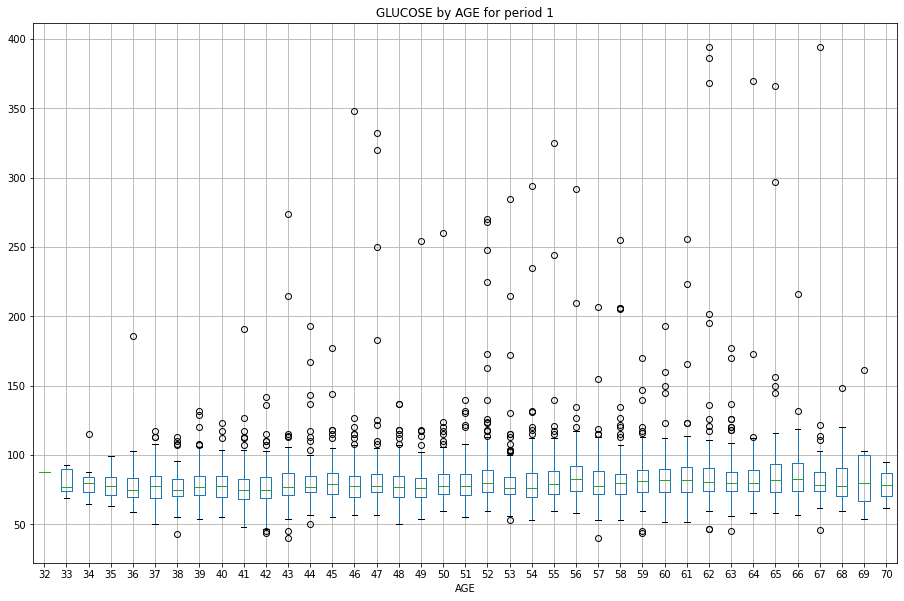

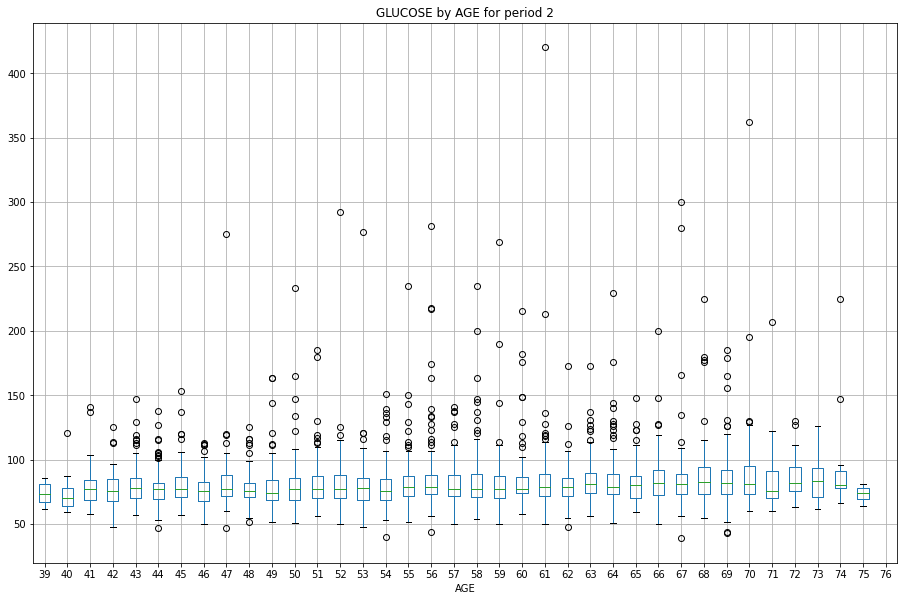

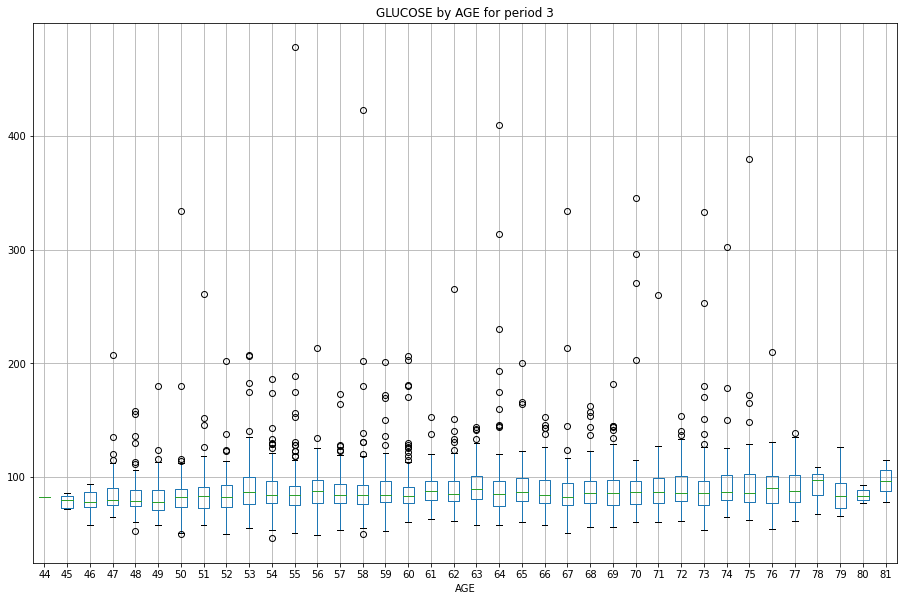

In [117]:
for period in range(1, 4):
    data.loc[(data.PERIOD == period), ['AGE', col_name] ].boxplot(column=[col_name], by='AGE', figsize=(15, 10))
    plt.title(col_name + " by AGE for period " + str(period))
    plt.suptitle('')

###  Diabetes <a name="diabetes">
    
Diabetic according to criteria of first exam treated or first exam with casual glucose of 200 mg/DL or more
    
[Experience analysis](#experience_analysis)

In [120]:
col_name = 'DIABETES'
groupby_arg = 'AGE'

In [122]:
data.loc[:, ['AGE', col_name] ].DIABETES.mean()

0.04558355551733035

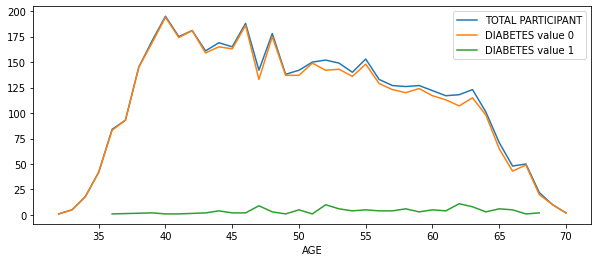

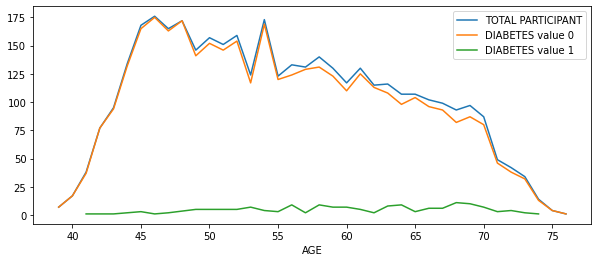

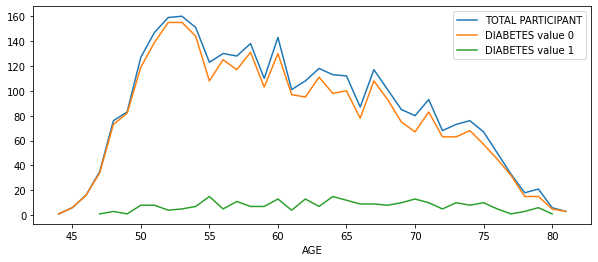

In [45]:
for period in range(1,4):
    fig, (ax1) = plt.subplots(figsize=(10,4))
    binary_data = data.loc[(data.PERIOD == period), [groupby_arg, col_name] ]
    
    ax1 = binary_data.groupby(groupby_arg).count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 0].groupby(groupby_arg).count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 1].groupby(groupby_arg).count().plot(ax=ax1)

    ax1.legend(["TOTAL PARTICIPANT", col_name + " value 0", col_name + " value 1"])
    plt.show()

###  Heart rate <a name="heartrte">
    
Ventricular rate in beats/min.
        
[Experience analysis](#experience_analysis)

In [123]:
col_name = 'HEARTRTE'
groupby_arg = 'AGE'

In [125]:
data.loc[:, ['AGE', col_name] ].HEARTRTE.describe()

count    11621.000000
mean        76.781516
std         12.463359
min         37.000000
25%         69.000000
50%         75.000000
75%         85.000000
max        220.000000
Name: HEARTRTE, dtype: float64

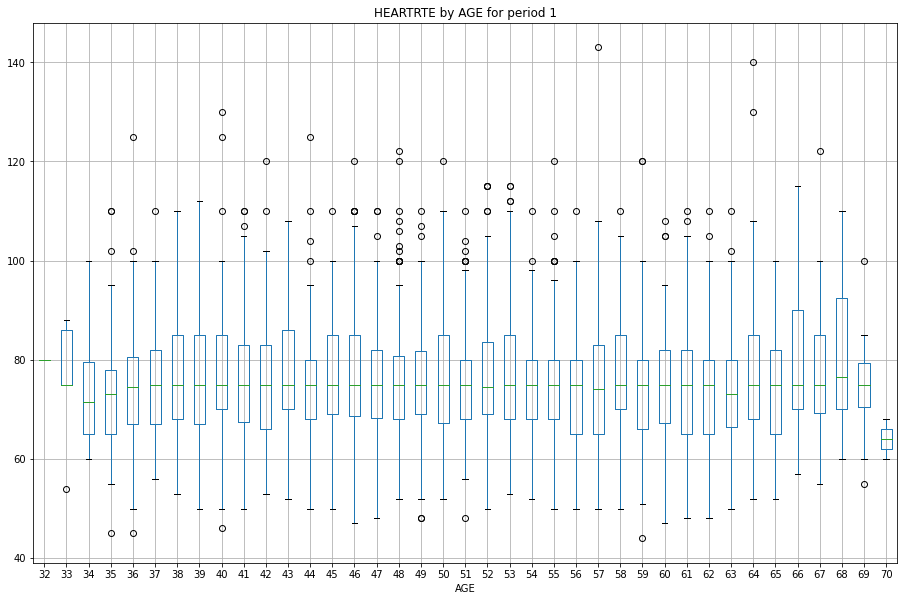

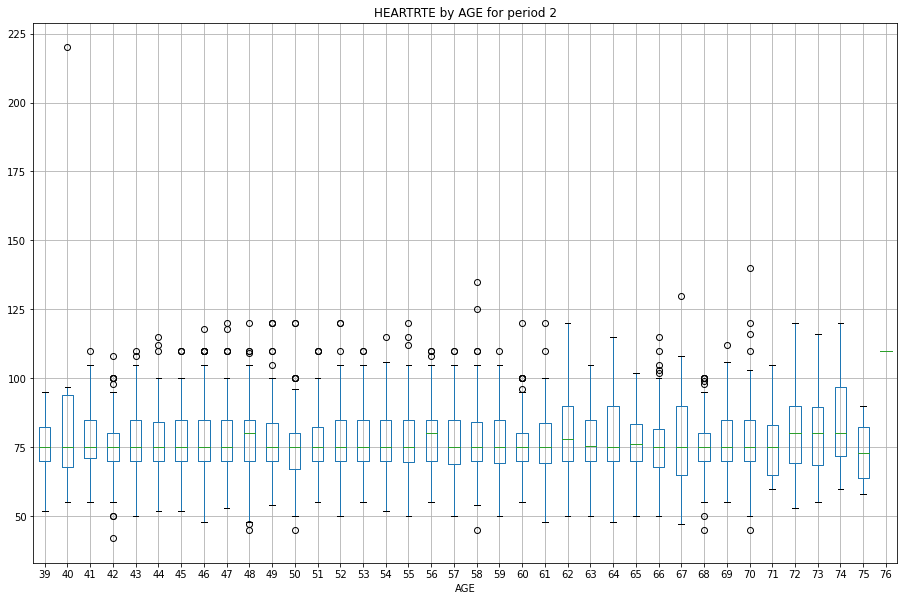

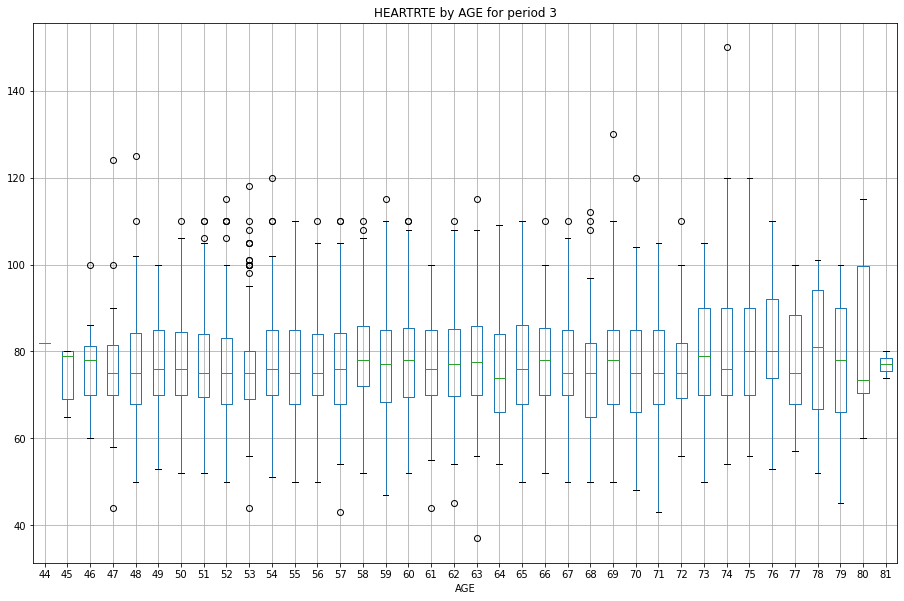

In [127]:
for period in range(1, 4):
    data.loc[(data.PERIOD == period), ['AGE', col_name] ].boxplot(column=[col_name], by='AGE', figsize=(15, 10))
    plt.title(col_name + " by AGE for period " + str(period))
    plt.suptitle('')

###  Prevalent angina pectoris at exam <a name="prevap">
    
    
[Experience analysis](#experience_analysis)

In [136]:
col_name = 'PREVAP'
groupby_arg = 'AGE'

In [139]:
data.loc[:, ['AGE', col_name] ].PREVAP.mean()

0.05392620624408704

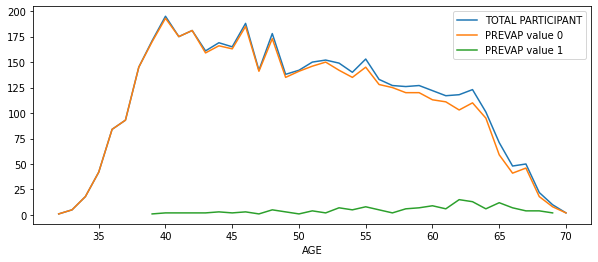

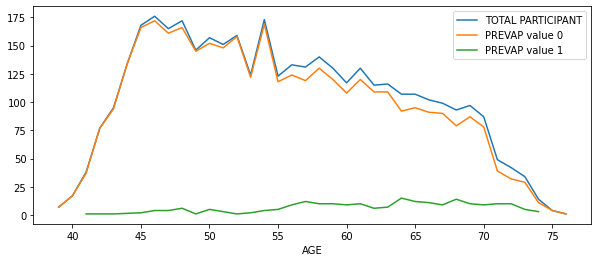

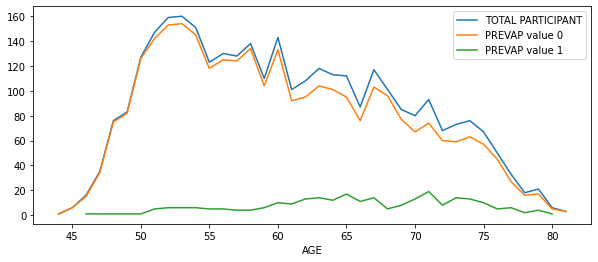

In [129]:
for period in range(1,4):
    fig, (ax1) = plt.subplots(figsize=(10,4))
    binary_data = data.loc[(data.PERIOD == period), [groupby_arg, col_name] ]
    
    ax1 = binary_data.groupby(groupby_arg).count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 0].groupby(groupby_arg).count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 1].groupby(groupby_arg).count().plot(ax=ax1)

    ax1.legend(["TOTAL PARTICIPANT", col_name + " value 0", col_name + " value 1"])
    plt.show()

###  Prevalent coronary heart Disease <a name="prevchd">
    
    
[Experience analysis](#experience_analysis)

In [140]:
col_name = 'PREVCHD'
groupby_arg = 'AGE'

In [141]:
data.loc[:, ['AGE', col_name] ].PREVCHD.mean()

0.07241764857658897

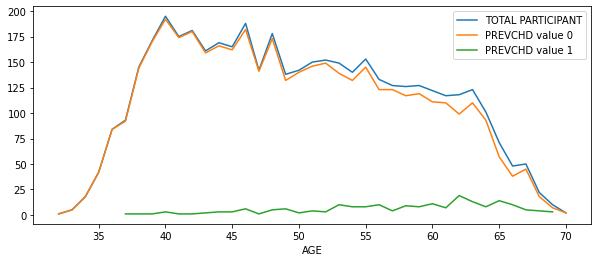

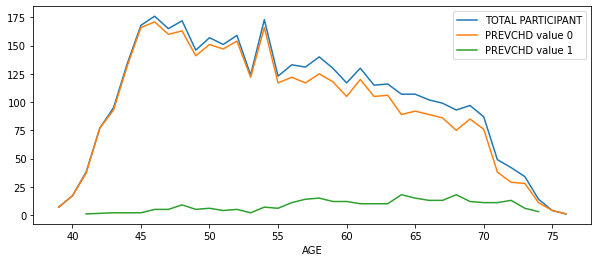

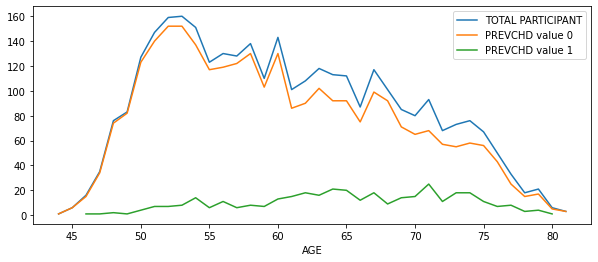

In [131]:
for period in range(1,4):
    fig, (ax1) = plt.subplots(figsize=(10,4))
    binary_data = data.loc[(data.PERIOD == period), [groupby_arg, col_name] ]
    
    ax1 = binary_data.groupby(groupby_arg).count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 0].groupby(groupby_arg).count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 1].groupby(groupby_arg).count().plot(ax=ax1)

    ax1.legend(["TOTAL PARTICIPANT", col_name + " value 0", col_name + " value 1"])
    plt.show()

###  Prevalent myocardial infarction <a name="prevmi">
    
[Experience analysis](#experience_analysis)

In [147]:
col_name = 'PREVMI'
groupby_arg = 'AGE'

In [148]:
data.loc[:, ['AGE', col_name] ].PREVMI.mean()

0.03216650898770104

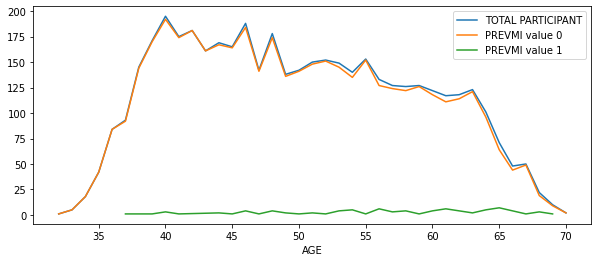

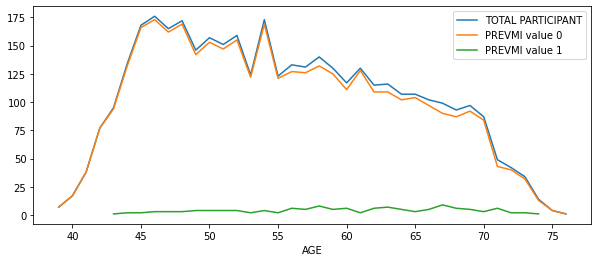

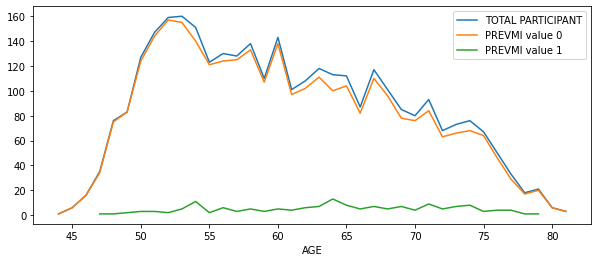

In [133]:
for period in range(1,4):
    fig, (ax1) = plt.subplots(figsize=(10,4))
    binary_data = data.loc[(data.PERIOD == period), [groupby_arg, col_name] ]
    
    ax1 = binary_data.groupby(groupby_arg).count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 0].groupby(groupby_arg).count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 1].groupby(groupby_arg).count().plot(ax=ax1)

    ax1.legend(["TOTAL PARTICIPANT", col_name + " value 0", col_name + " value 1"])
    plt.show()

###  Prevalent stroke <a name="prevstrk">
    
    
[Experience analysis](#experience_analysis)

In [145]:
col_name = 'PREVSTRK'
groupby_arg = 'AGE'

In [146]:
data.loc[:, ['AGE', col_name] ].PREVSTRK.mean()

0.013073019695536252

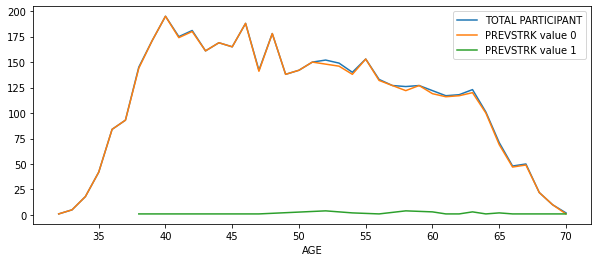

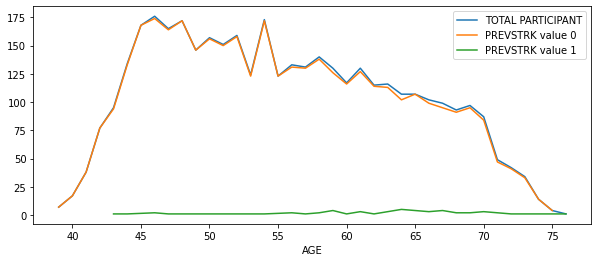

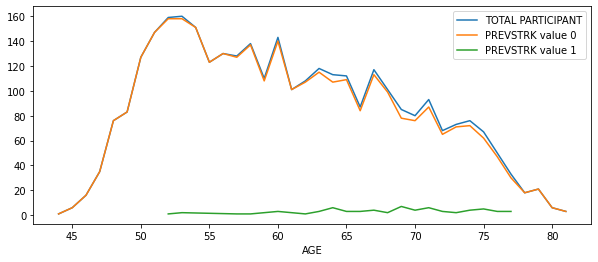

In [55]:
for period in range(1,4):
    fig, (ax1) = plt.subplots(figsize=(10,4))
    binary_data = data.loc[(data.PERIOD == period), [groupby_arg, col_name] ]
    
    ax1 = binary_data.groupby(groupby_arg).count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 0].groupby(groupby_arg).count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 1].groupby(groupby_arg).count().plot(ax=ax1)

    ax1.legend(["TOTAL PARTICIPANT", col_name + " value 0", col_name + " value 1"])
    plt.show()

###  Prevalent hypertensive <a name="prevhyp">
    
[Experience analysis](#experience_analysis)

In [143]:
col_name = 'PREVHYP'
groupby_arg = 'AGE'

In [144]:
data.loc[:, ['AGE', col_name] ].PREVHYP.mean()

0.4596198503483272

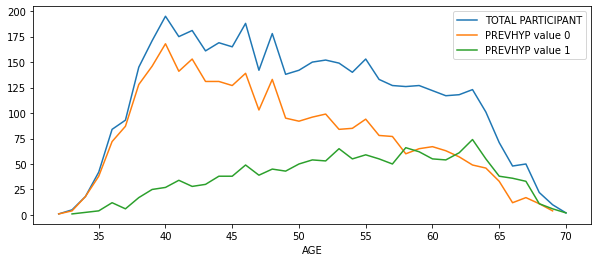

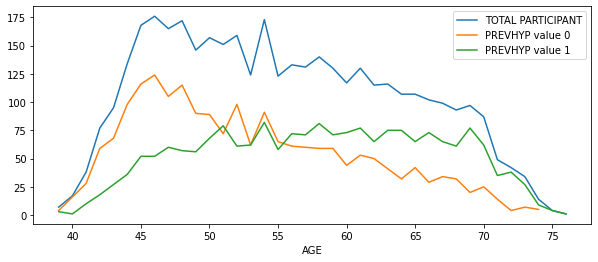

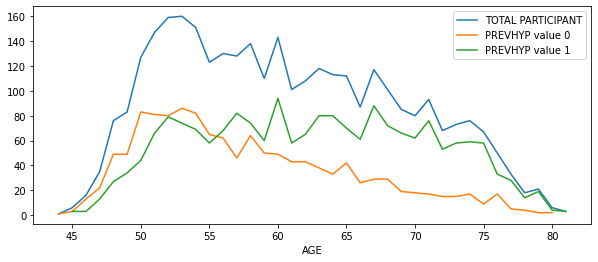

In [57]:
for period in range(1,4):
    fig, (ax1) = plt.subplots(figsize=(10,4))
    binary_data = data.loc[(data.PERIOD == period), [groupby_arg, col_name] ]
    
    ax1 = binary_data.groupby(groupby_arg).count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 0].groupby(groupby_arg).count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 1].groupby(groupby_arg).count().plot(ax=ax1)

    ax1.legend(["TOTAL PARTICIPANT", col_name + " value 0", col_name + " value 1"])
    plt.show()

Result analysis:

In [208]:
col_name = 'ANGINA'

In [198]:
data.loc[:, ['AGE', col_name] ].ANGINA.mean()

0.16358475961124969

In [199]:
binary_data = data.loc[(data.PERIOD == 1), ['AGE', col_name, 'SYSBP'] ]
binary_data[(binary_data[col_name] == 1) & (binary_data['SYSBP'] >= 120) ]

AGE  ANGINA  SYSBP
15      63       1  138.0
81      40       1  125.0
85      61       1  134.0
88      62       1  125.0
112     52       1  148.0
...    ...     ...    ...
11587   43       1  122.0
11590   58       1  125.5
11595   50       1  190.0
11608   50       1  179.0
11619   52       1  133.5

[587 rows x 3 columns]

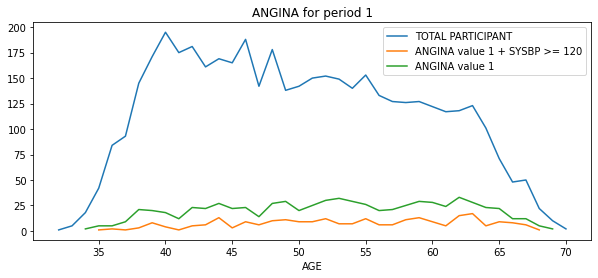

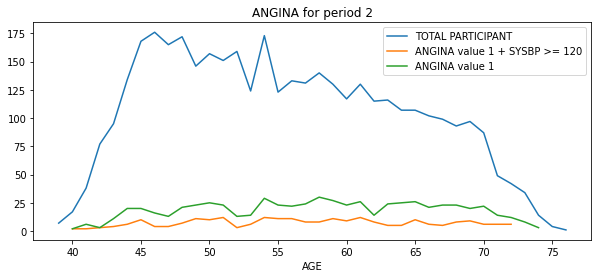

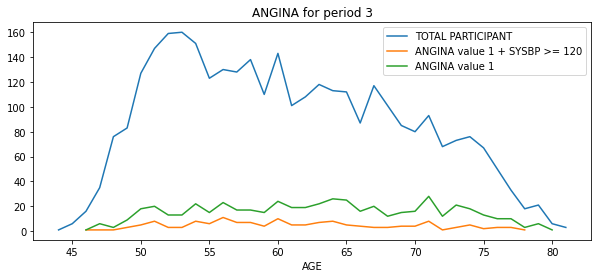

In [211]:
for period in range(1,4):
    fig, (ax1) = plt.subplots(figsize=(10,4))

    binary_data = data.loc[(data.PERIOD == period), ['AGE', col_name, 'DIABP'] ]
    
    ax1 = binary_data.groupby('AGE')[col_name].count().plot(ax=ax1)
    ax1 = binary_data[(binary_data['DIABP'] >= 90) & (binary_data[col_name] == 1)].groupby('AGE')[col_name].count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 1].groupby('AGE')[col_name].count().plot(ax=ax1, title = col_name + " for period " + str(period))

    ax1.legend(["TOTAL PARTICIPANT", col_name + " value 1 + SYSBP >= 120", col_name + " value 1"])
    plt.show()

In [154]:
col_name = 'HOSPMI'

In [177]:
data.loc[:, ['AGE', col_name] ]..HOSPMI.mean()

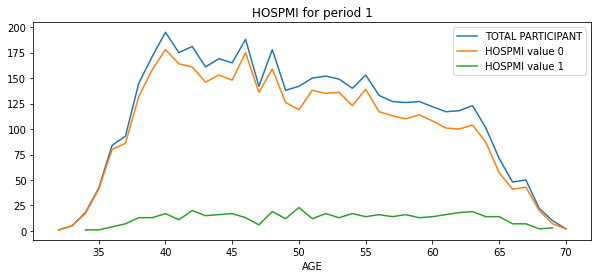

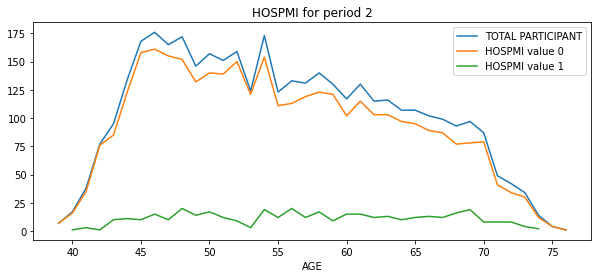

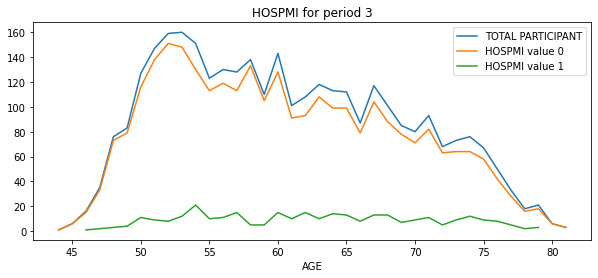

In [156]:
for period in range(1,4):
    fig, (ax1) = plt.subplots(figsize=(10,4))

    binary_data = data.loc[(data.PERIOD == period), ['AGE', col_name] ]
    
    ax1 = binary_data.groupby('AGE').count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 0].groupby('AGE').count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 1].groupby('AGE').count().plot(ax=ax1, title = col_name + " for period " + str(period))

    ax1.legend(["TOTAL PARTICIPANT", col_name + " value 0", col_name + " value 1"])
    plt.show()

In [157]:
col_name = 'MI_FCHD'

In [158]:
data.loc[:, ['AGE', col_name] ].MI_FCHD.mean()

0.15377999483959748

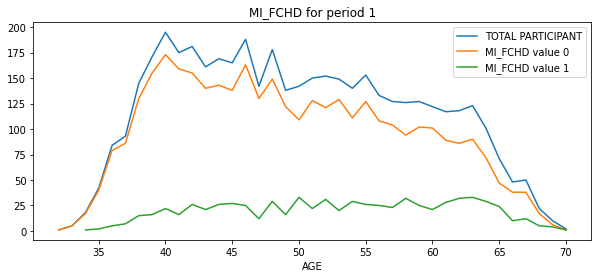

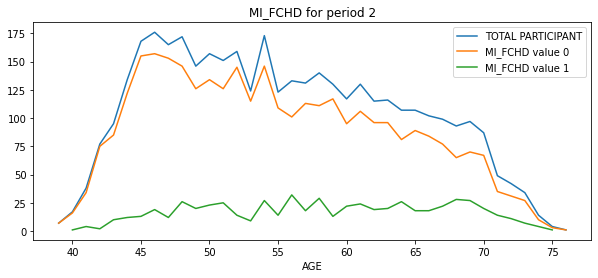

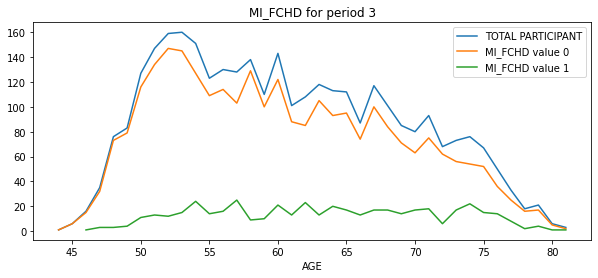

In [159]:
for period in range(1,4):
    fig, (ax1) = plt.subplots(figsize=(10,4))

    binary_data = data.loc[(data.PERIOD == period), ['AGE', col_name] ]
    
    ax1 = binary_data.groupby('AGE').count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 0].groupby('AGE').count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 1].groupby('AGE').count().plot(ax=ax1, title = col_name + " for period " + str(period))

    ax1.legend(["TOTAL PARTICIPANT", col_name + " value 0", col_name + " value 1"])
    plt.show()

In [160]:
col_name = 'ANYCHD'

In [161]:
data.loc[:, ['AGE', col_name] ].ANYCHD.mean()

0.2716091855164703

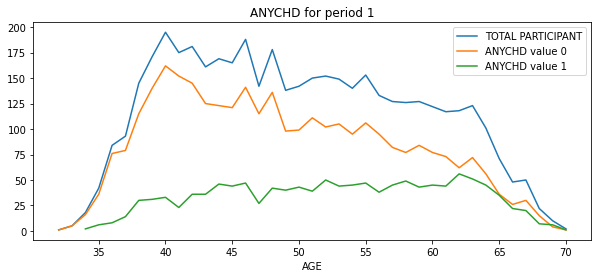

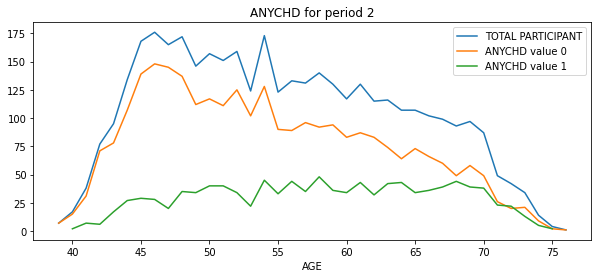

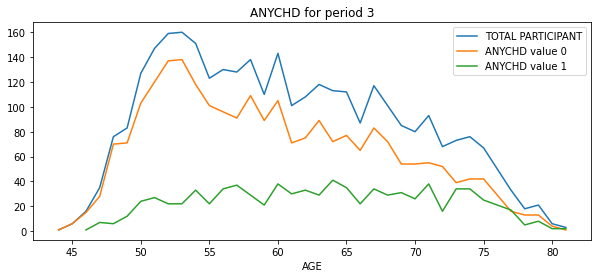

In [162]:
for period in range(1,4):
    fig, (ax1) = plt.subplots(figsize=(10,4))

    binary_data = data.loc[(data.PERIOD == period), ['AGE', col_name] ]
    
    ax1 = binary_data.groupby('AGE').count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 0].groupby('AGE').count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 1].groupby('AGE').count().plot(ax=ax1, title = col_name + " for period " + str(period))

    ax1.legend(["TOTAL PARTICIPANT", col_name + " value 0", col_name + " value 1"])
    plt.show()

In [164]:
col_name = 'STROKE'

In [165]:
data.loc[:, ['AGE', col_name] ].STROKE.mean()

0.09125311774318397

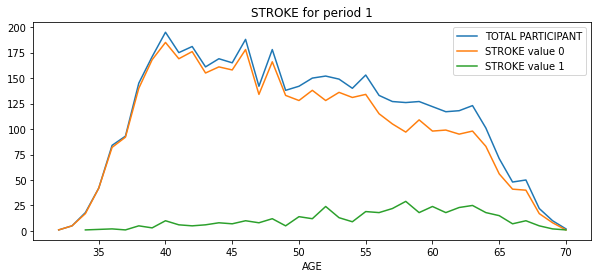

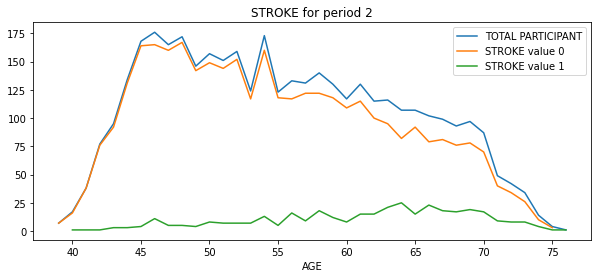

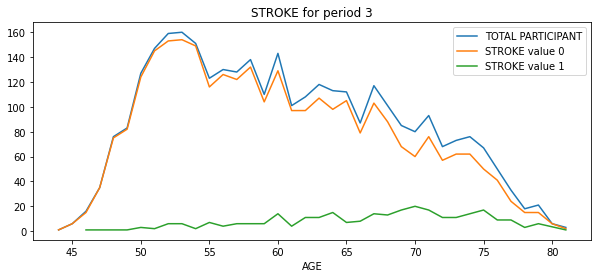

In [166]:
for period in range(1,4):
    fig, (ax1) = plt.subplots(figsize=(10,4))

    binary_data = data.loc[(data.PERIOD == period), ['AGE', col_name] ]
    
    ax1 = binary_data.groupby('AGE').count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 0].groupby('AGE').count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 1].groupby('AGE').count().plot(ax=ax1, title = col_name + " for period " + str(period))

    ax1.legend(["TOTAL PARTICIPANT", col_name + " value 0", col_name + " value 1"])
    plt.show()

In [167]:
col_name = 'CVD'

In [168]:
data.loc[:, ['AGE', col_name] ].CVD.mean()

0.2493334480089447

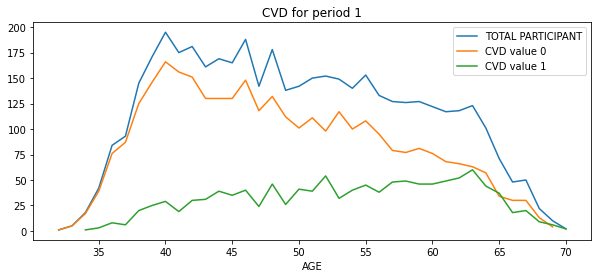

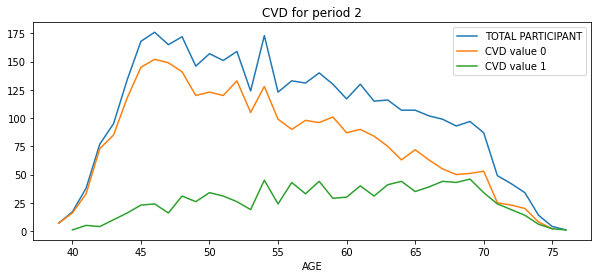

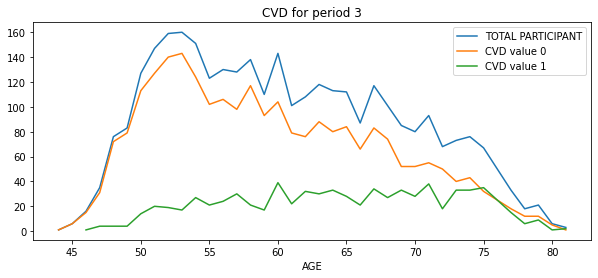

In [169]:
for period in range(1,4):
    fig, (ax1) = plt.subplots(figsize=(10,4))

    binary_data = data.loc[(data.PERIOD == period), ['AGE', col_name] ]
    
    ax1 = binary_data.groupby('AGE').count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 0].groupby('AGE').count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 1].groupby('AGE').count().plot(ax=ax1, title = col_name + " for period " + str(period))

    ax1.legend(["TOTAL PARTICIPANT", col_name + " value 0", col_name + " value 1"])
    plt.show()

In [170]:
col_name = 'HYPERTEN'

In [171]:
data.loc[:, ['AGE', col_name] ].HYPERTEN.mean()

0.7432699750580545

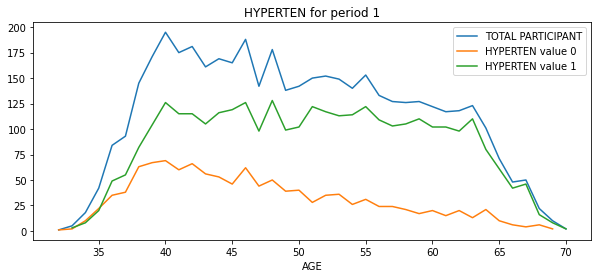

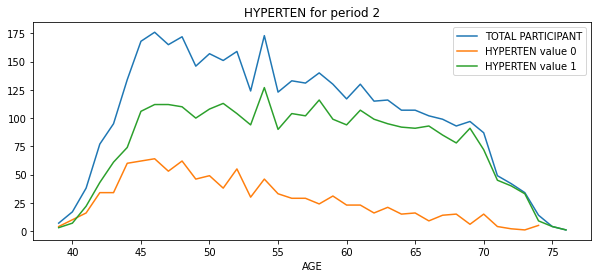

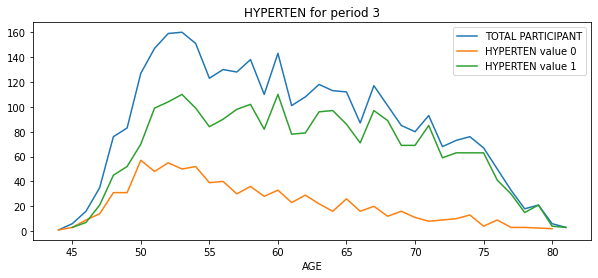

In [172]:
for period in range(1,4):
    fig, (ax1) = plt.subplots(figsize=(10,4))

    binary_data = data.loc[(data.PERIOD == period), ['AGE', col_name] ]
    
    ax1 = binary_data.groupby('AGE').count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 0].groupby('AGE').count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 1].groupby('AGE').count().plot(ax=ax1, title = col_name + " for period " + str(period))

    ax1.legend(["TOTAL PARTICIPANT", col_name + " value 0", col_name + " value 1"])
    plt.show()

In [173]:
col_name = 'DEATH'

In [174]:
data.loc[:, ['AGE', col_name] ].DEATH.mean()

0.303345660961555

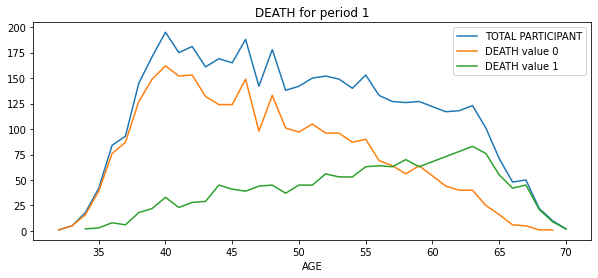

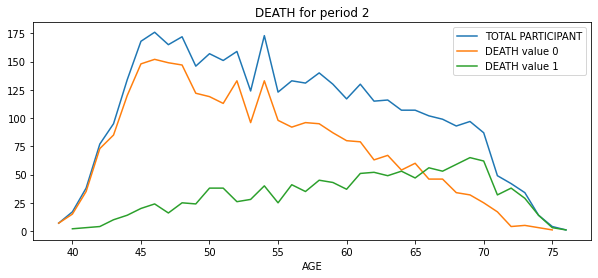

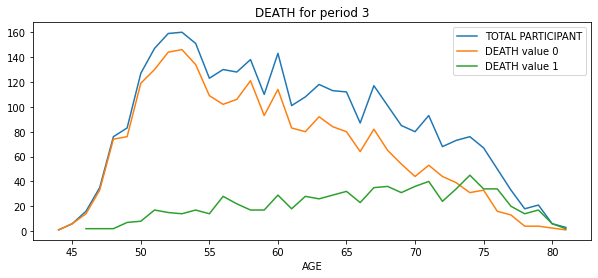

In [175]:
for period in range(1,4):
    fig, (ax1) = plt.subplots(figsize=(10,4))

    binary_data = data.loc[(data.PERIOD == period), ['AGE', col_name] ]
    
    ax1 = binary_data.groupby('AGE').count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 0].groupby('AGE').count().plot(ax=ax1)
    ax1 = binary_data[binary_data[col_name] == 1].groupby('AGE').count().plot(ax=ax1, title = col_name + " for period " + str(period))

    ax1.legend(["TOTAL PARTICIPANT", col_name + " value 0", col_name + " value 1"])
    plt.show()